# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

Libraries

In [1]:
from utility import read_all_test_data_from_path
from utility import read_all_csvs_one_test
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pca
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Create a dataframe to store data from all the test.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



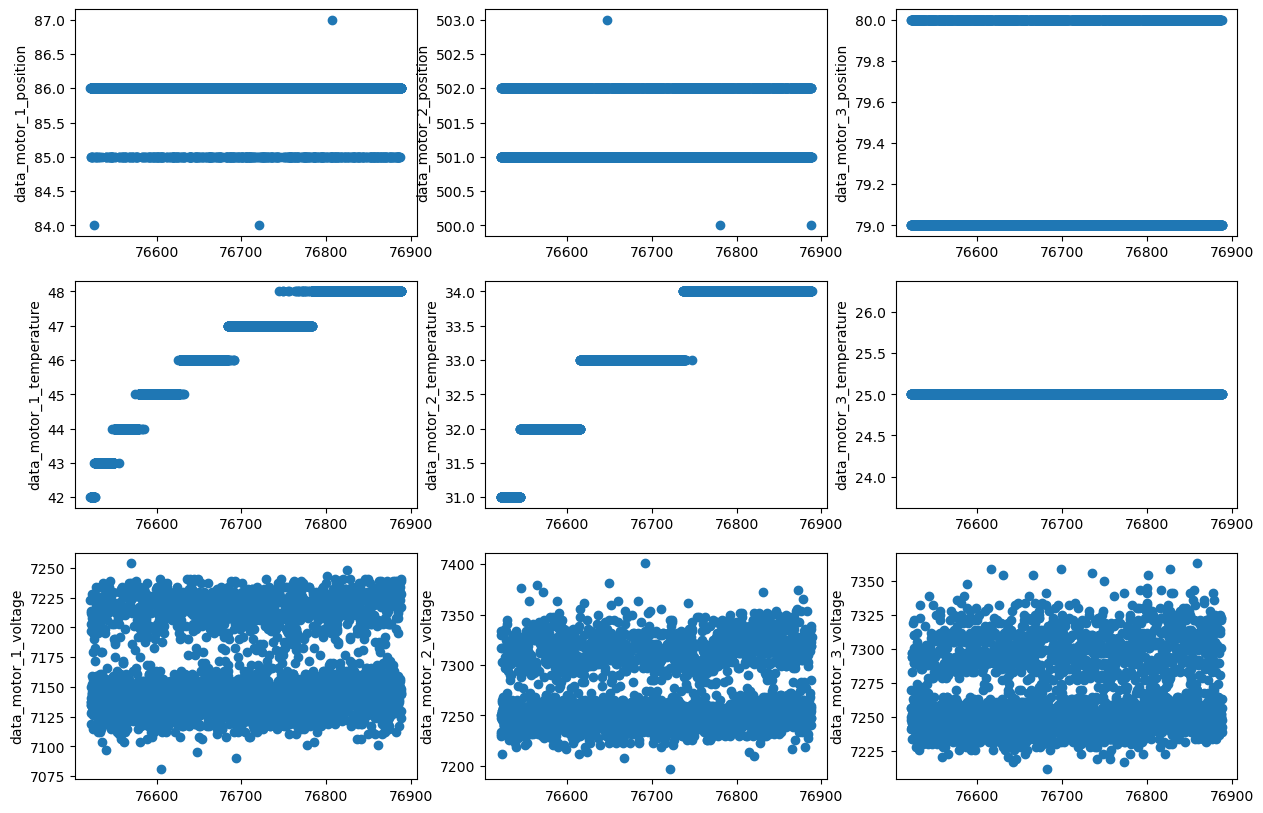

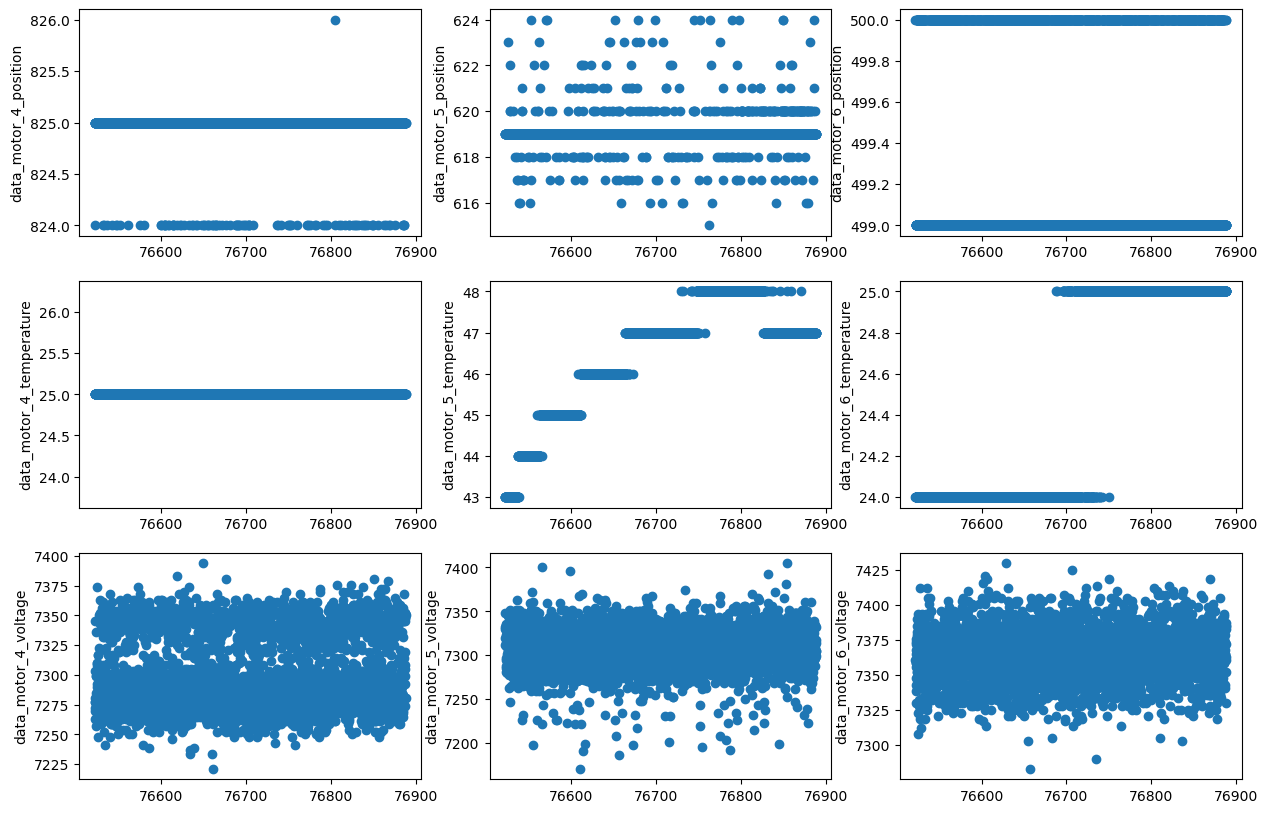

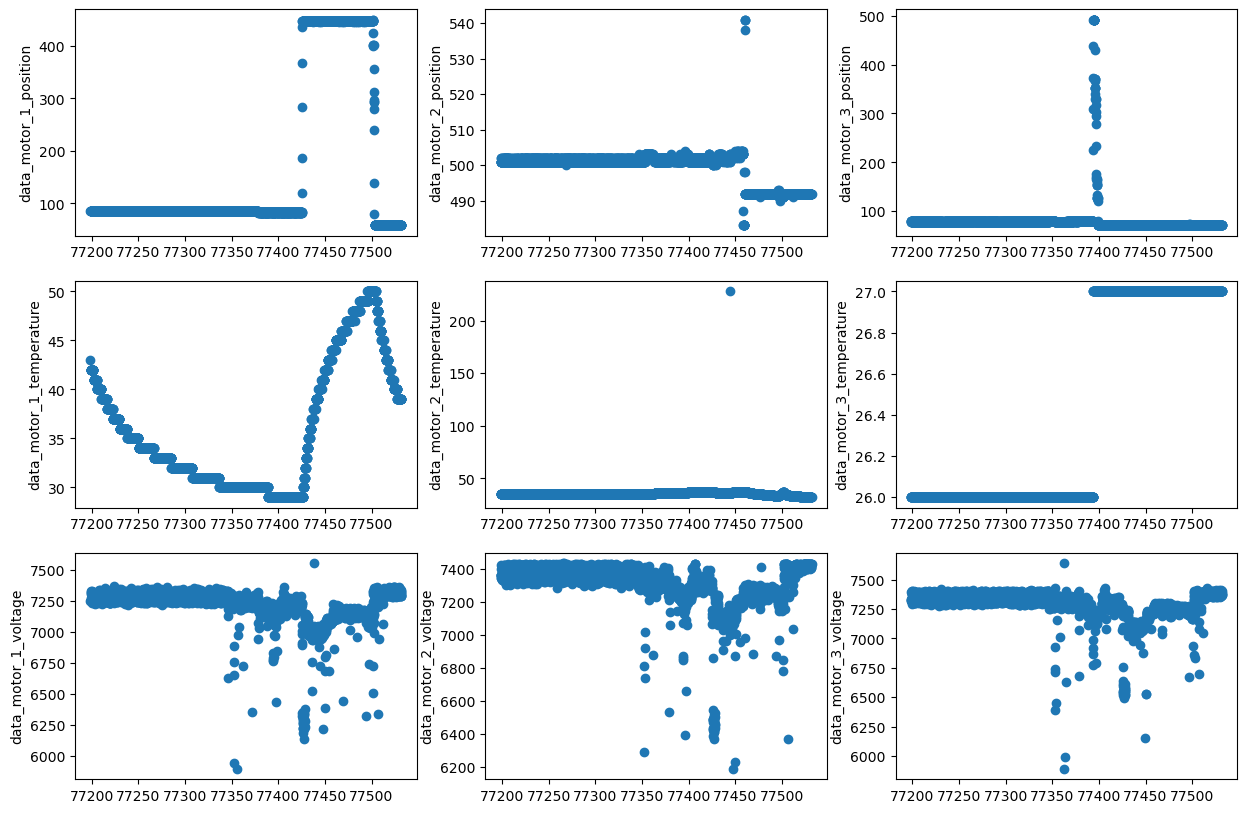

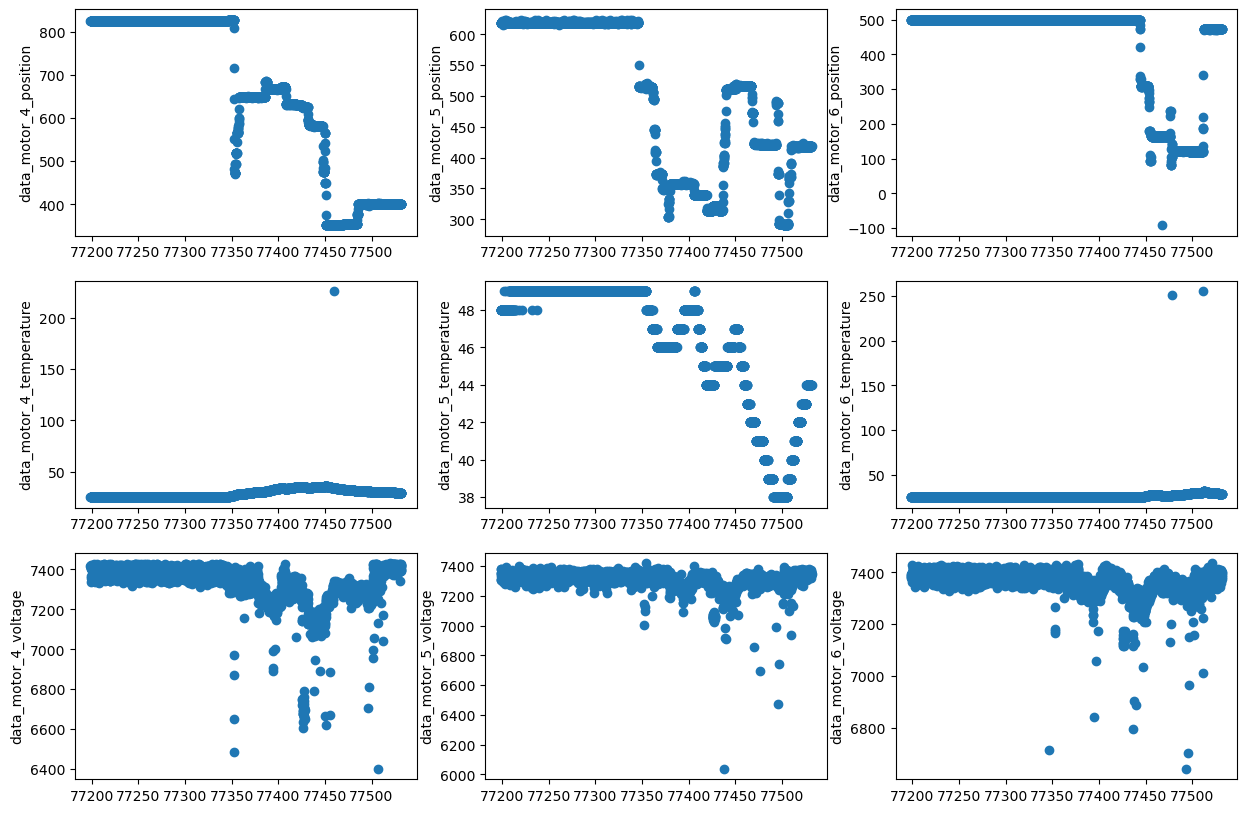

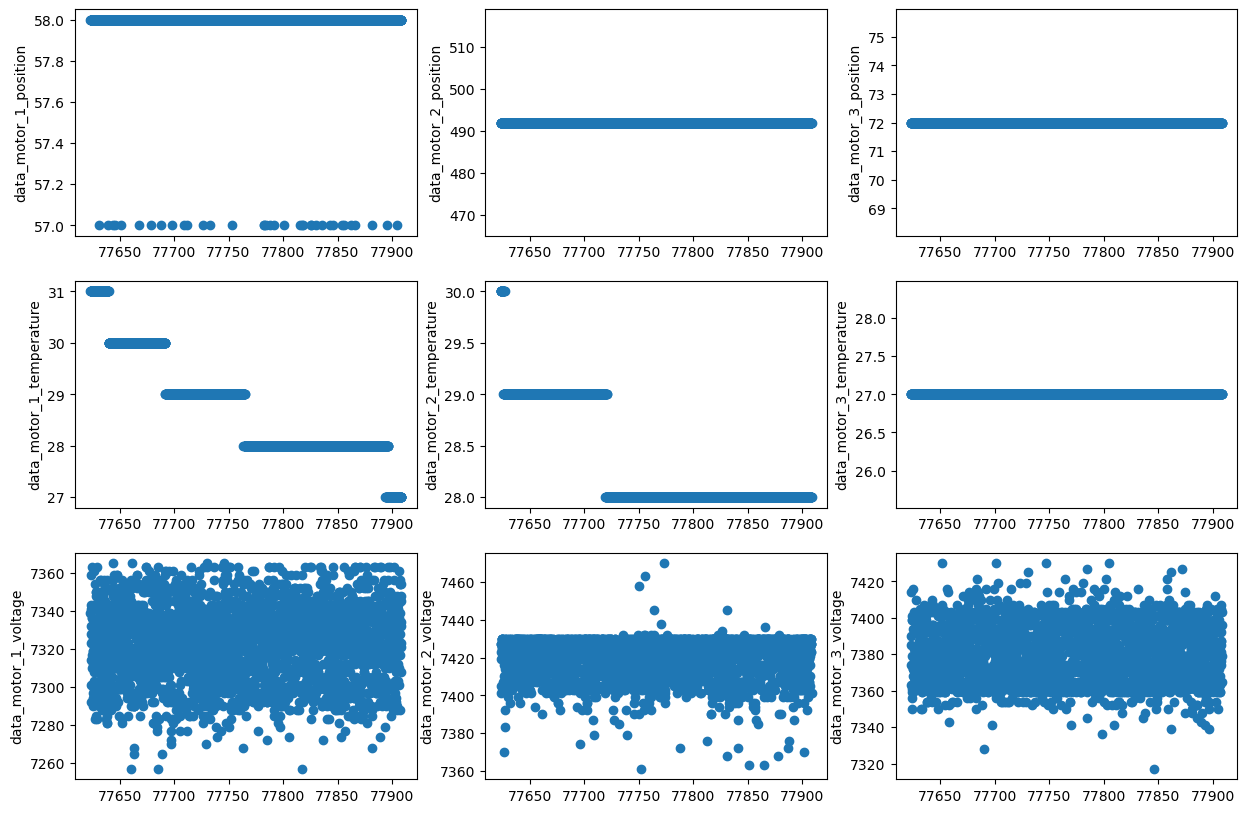

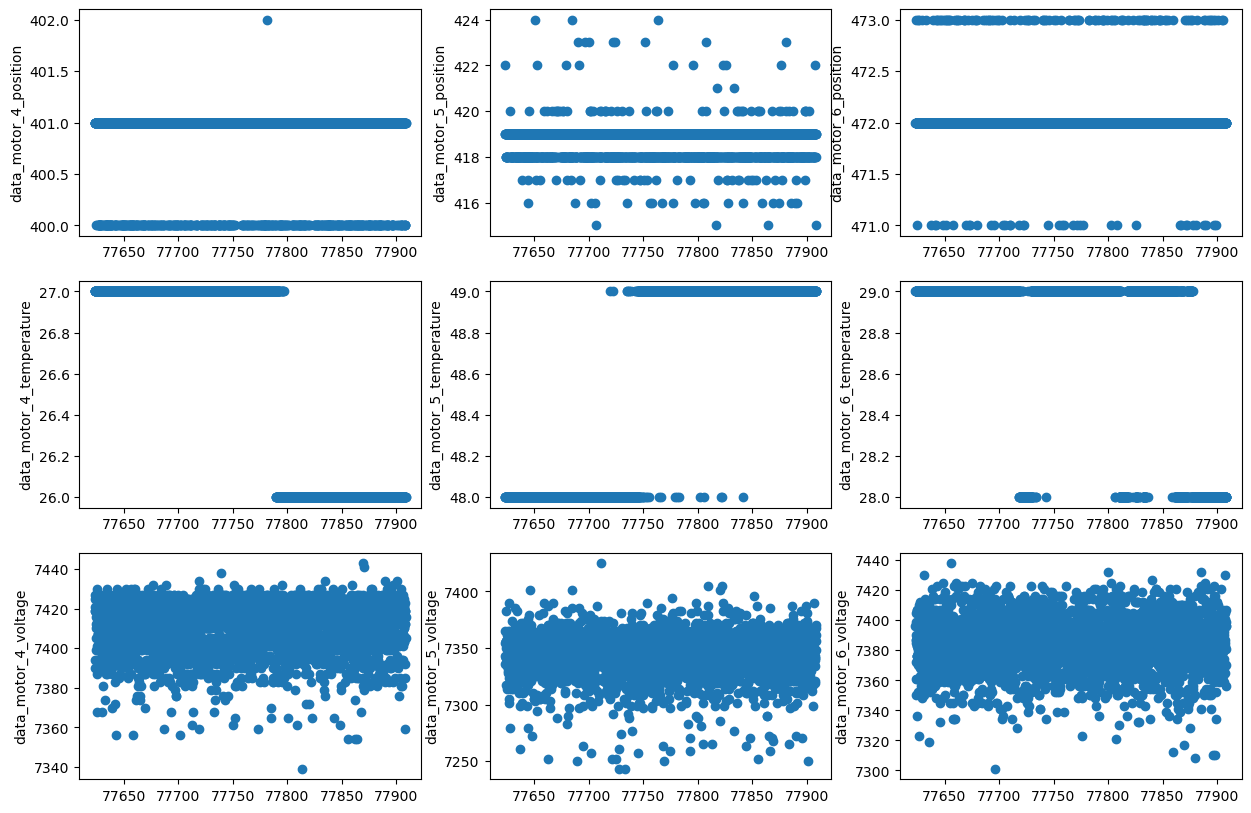

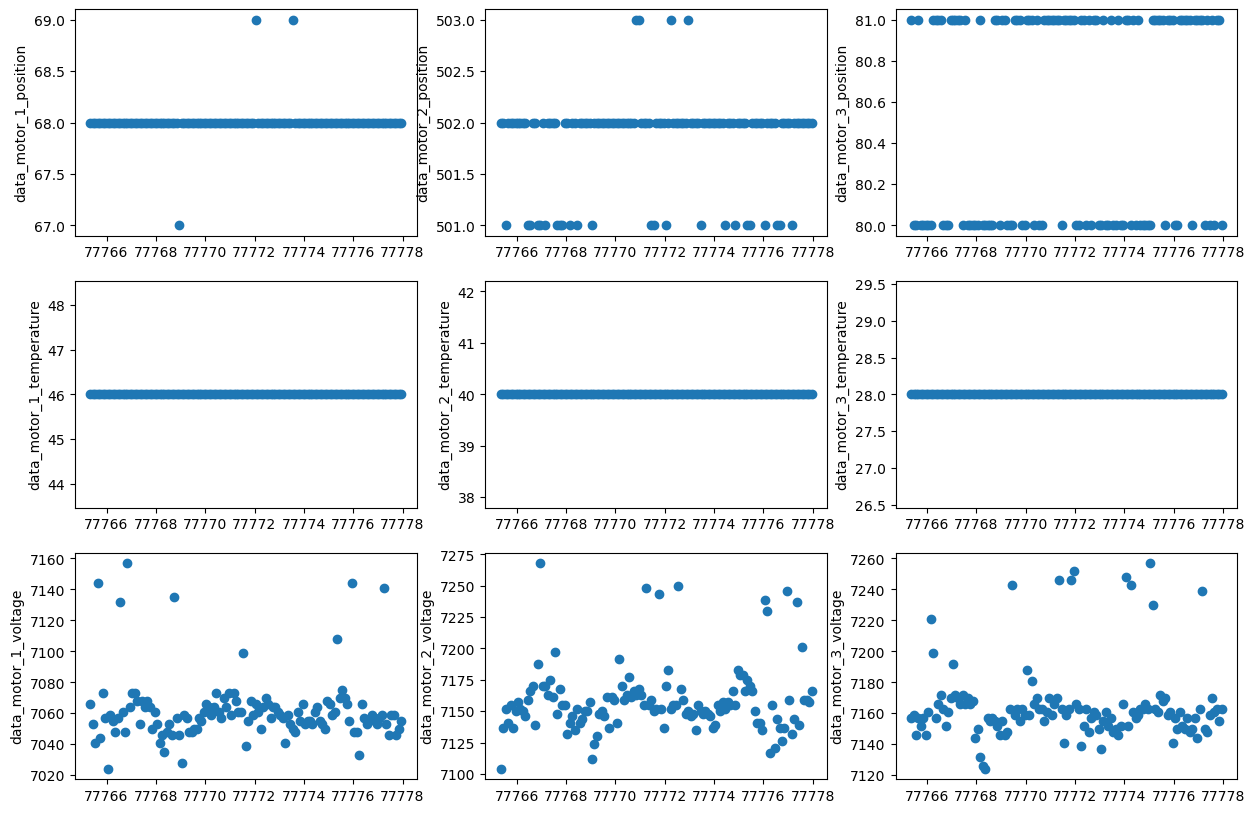

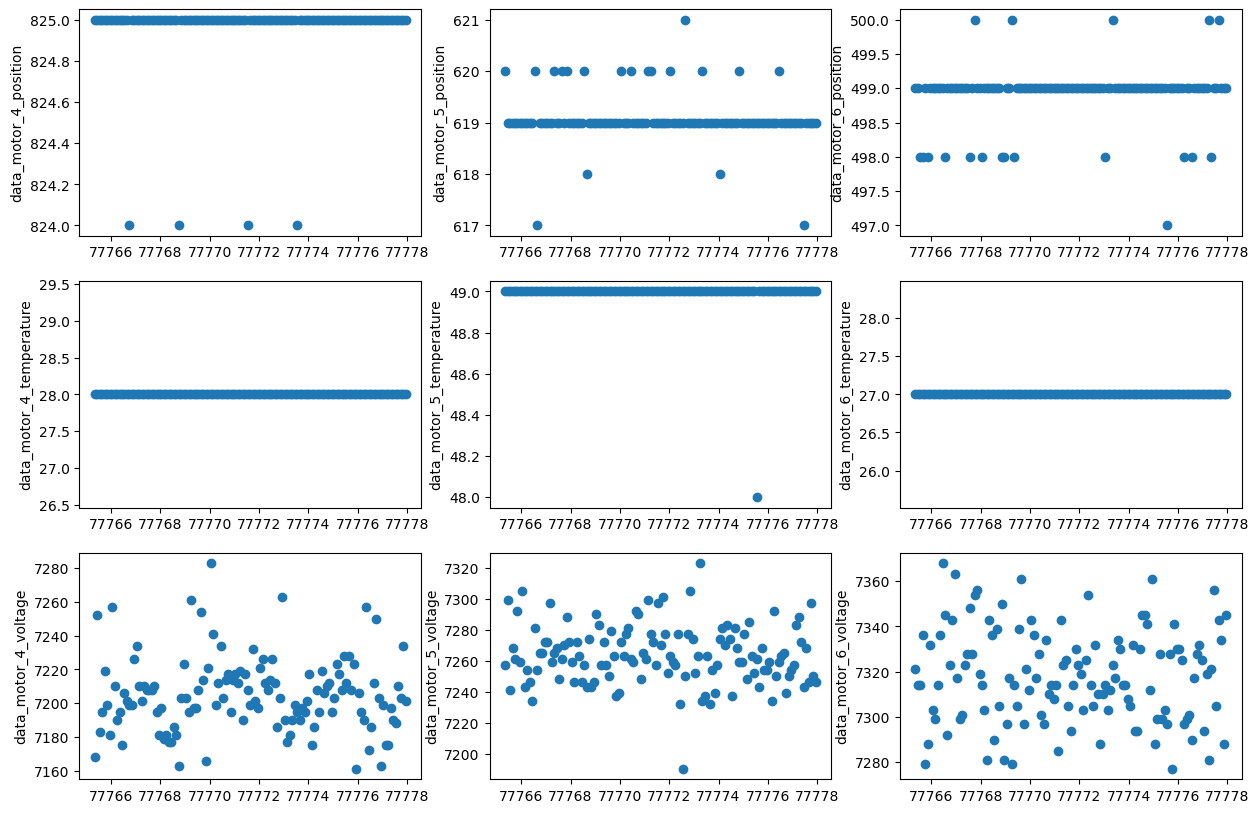

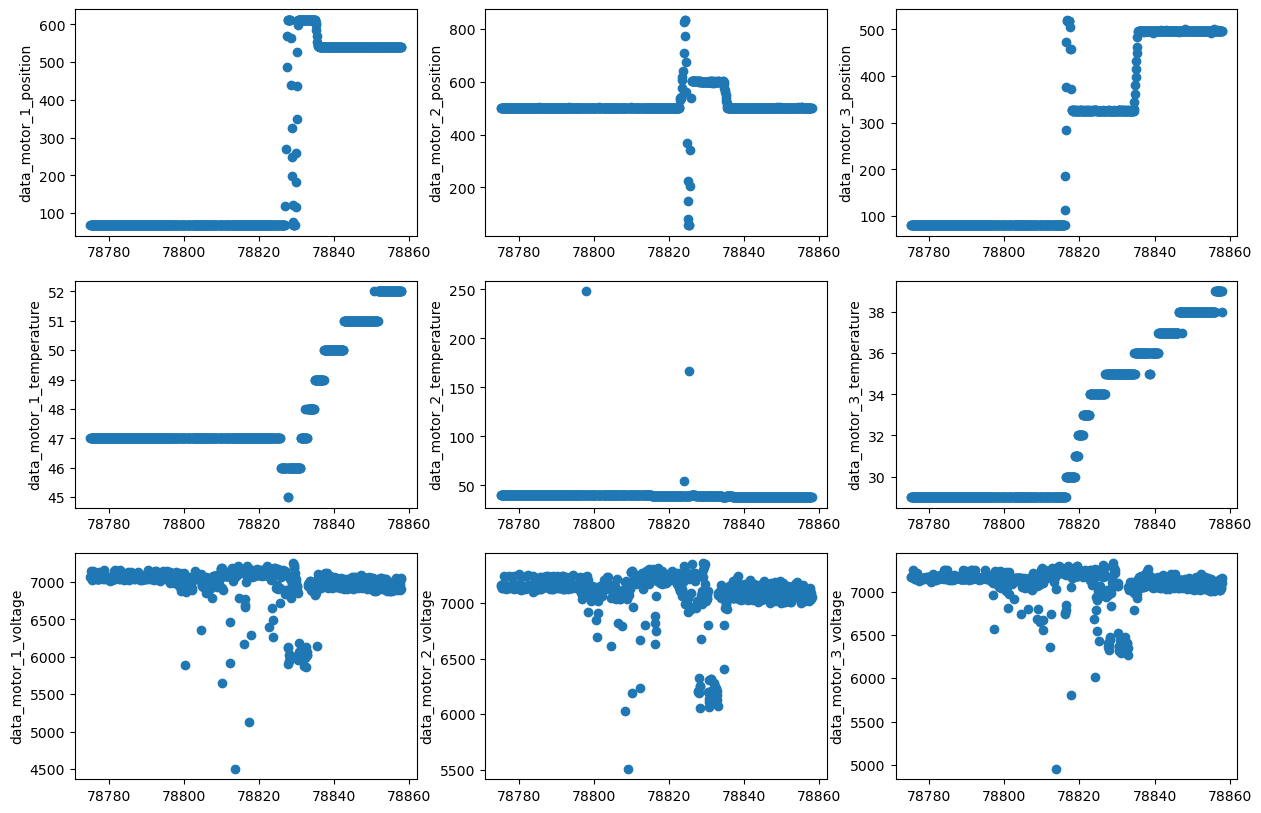

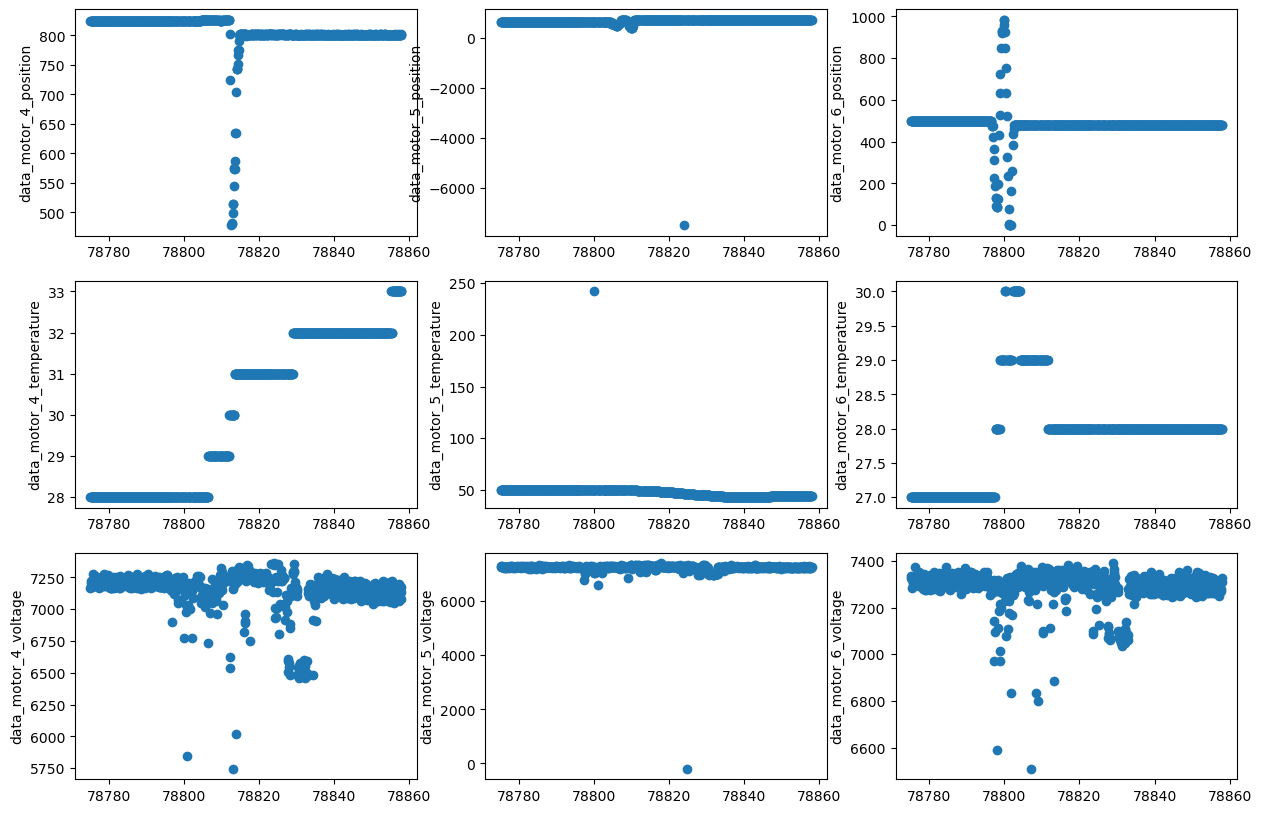

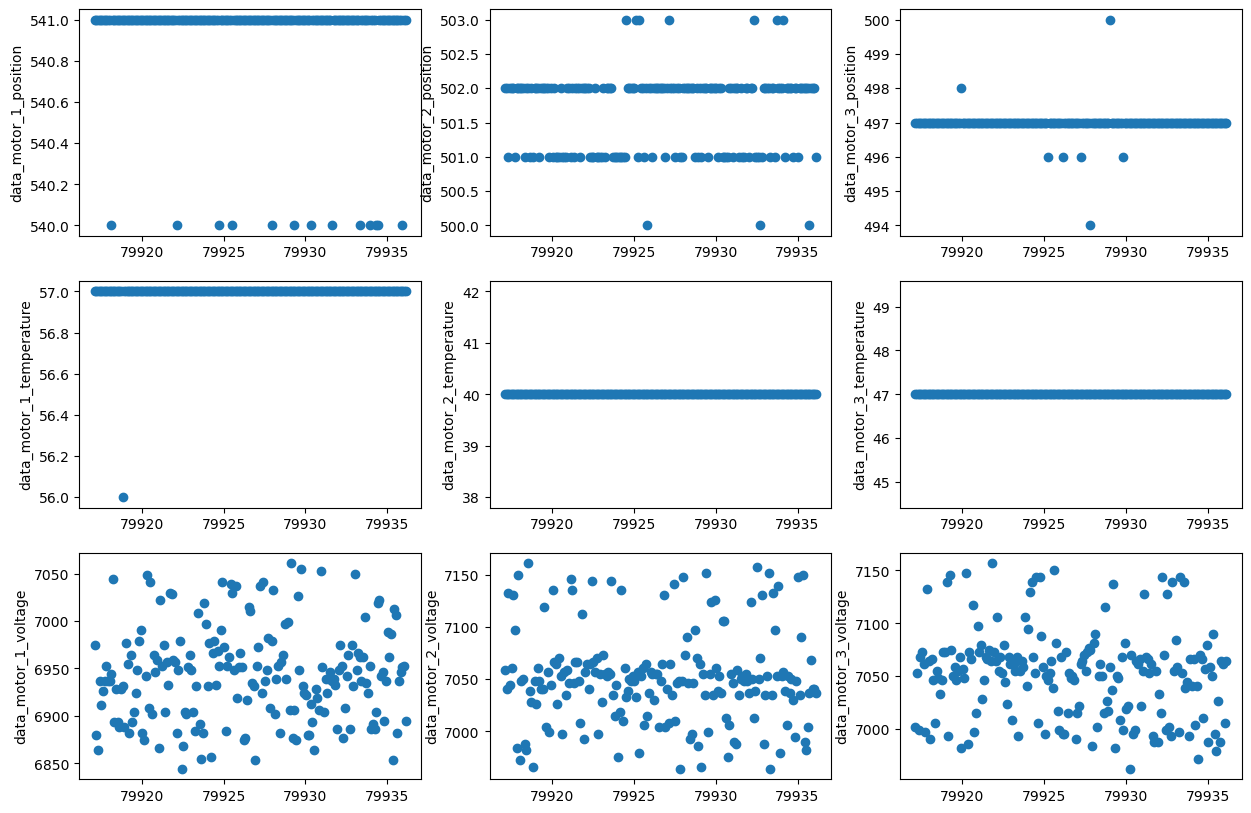

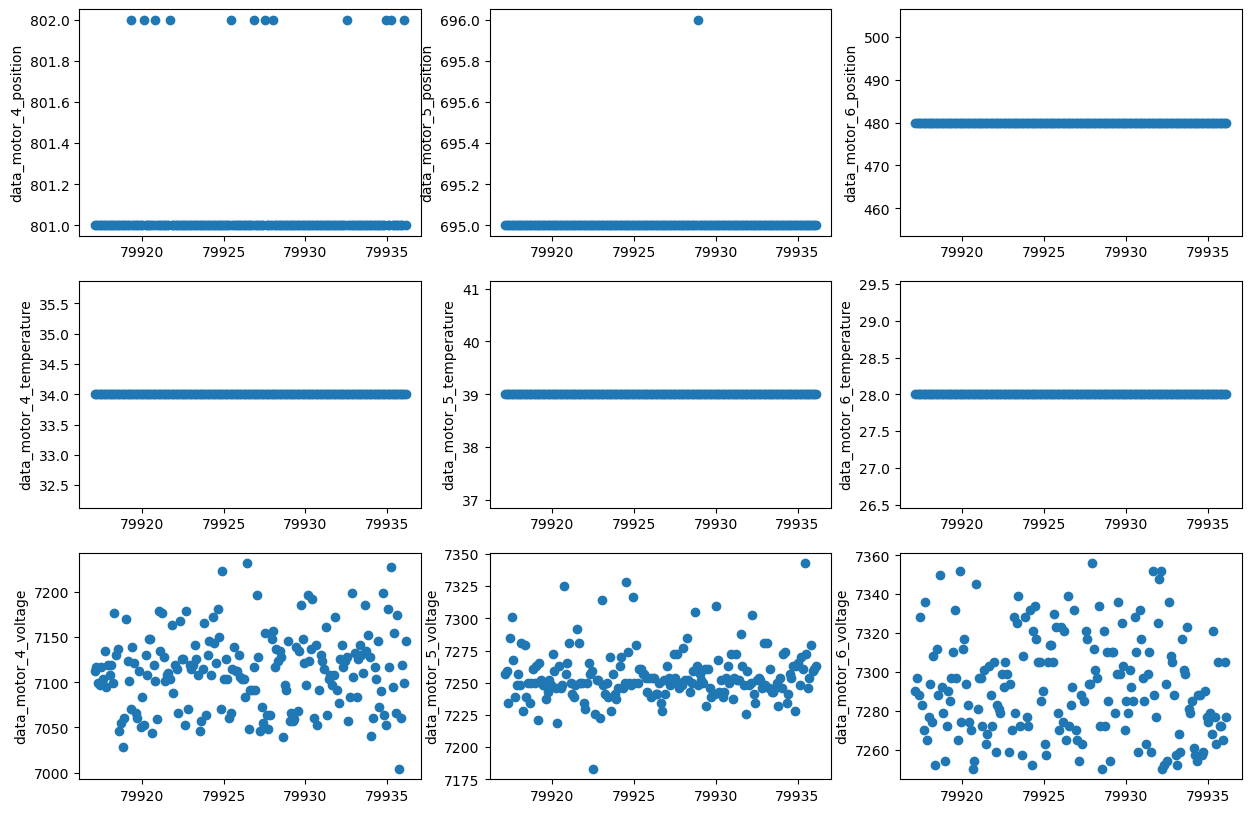

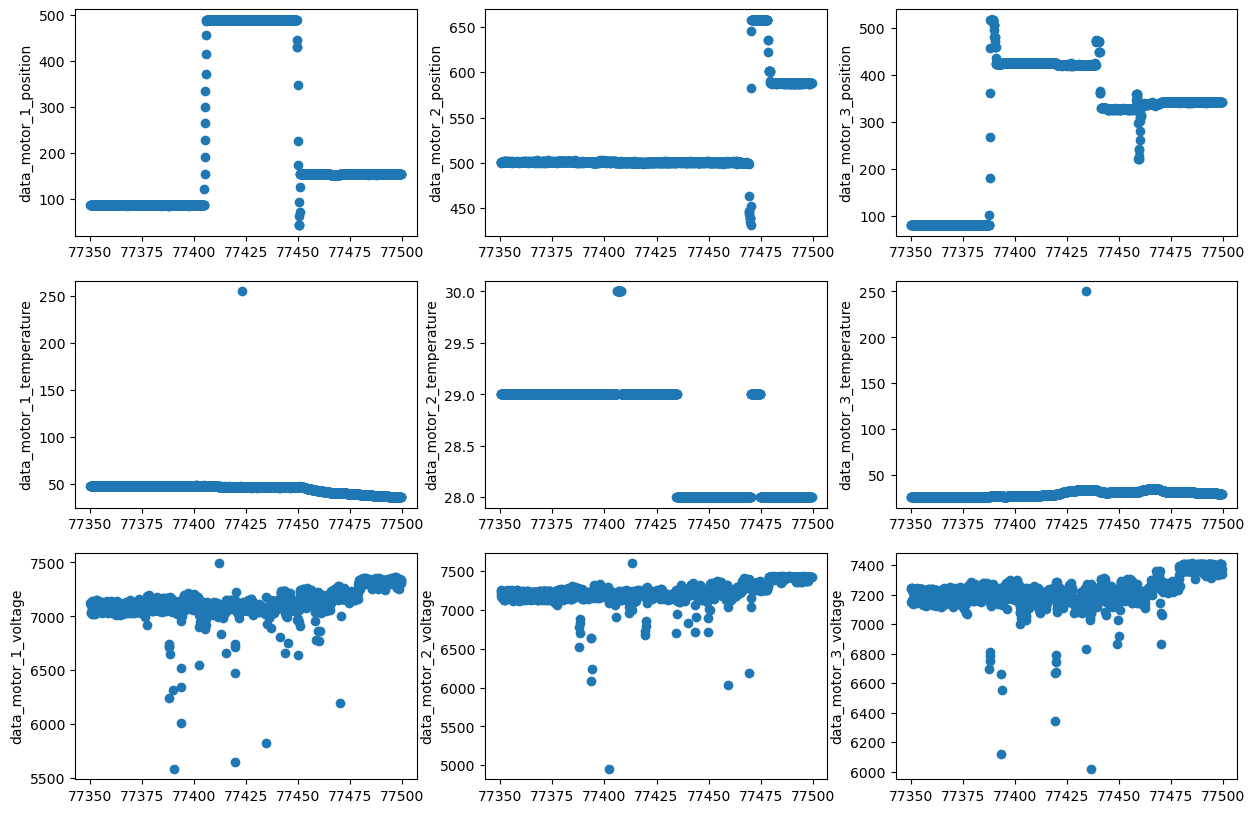

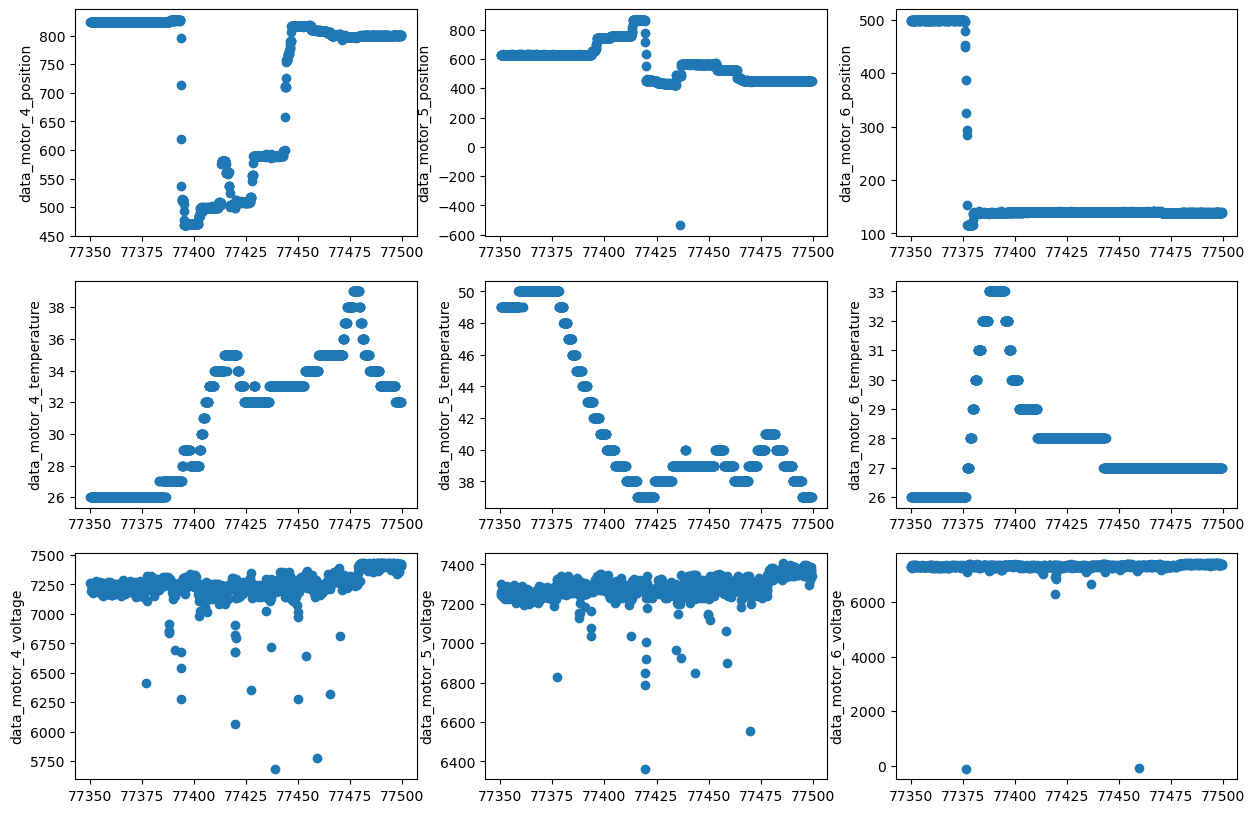

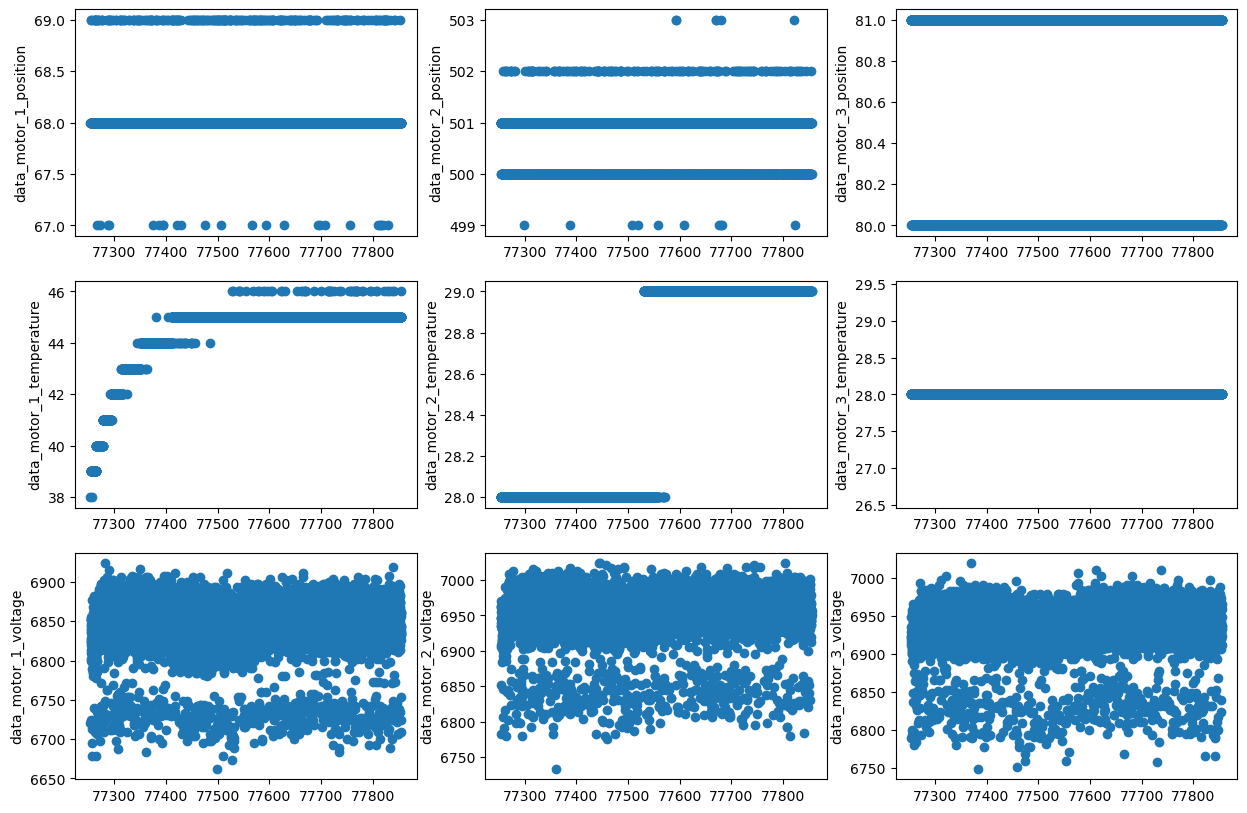

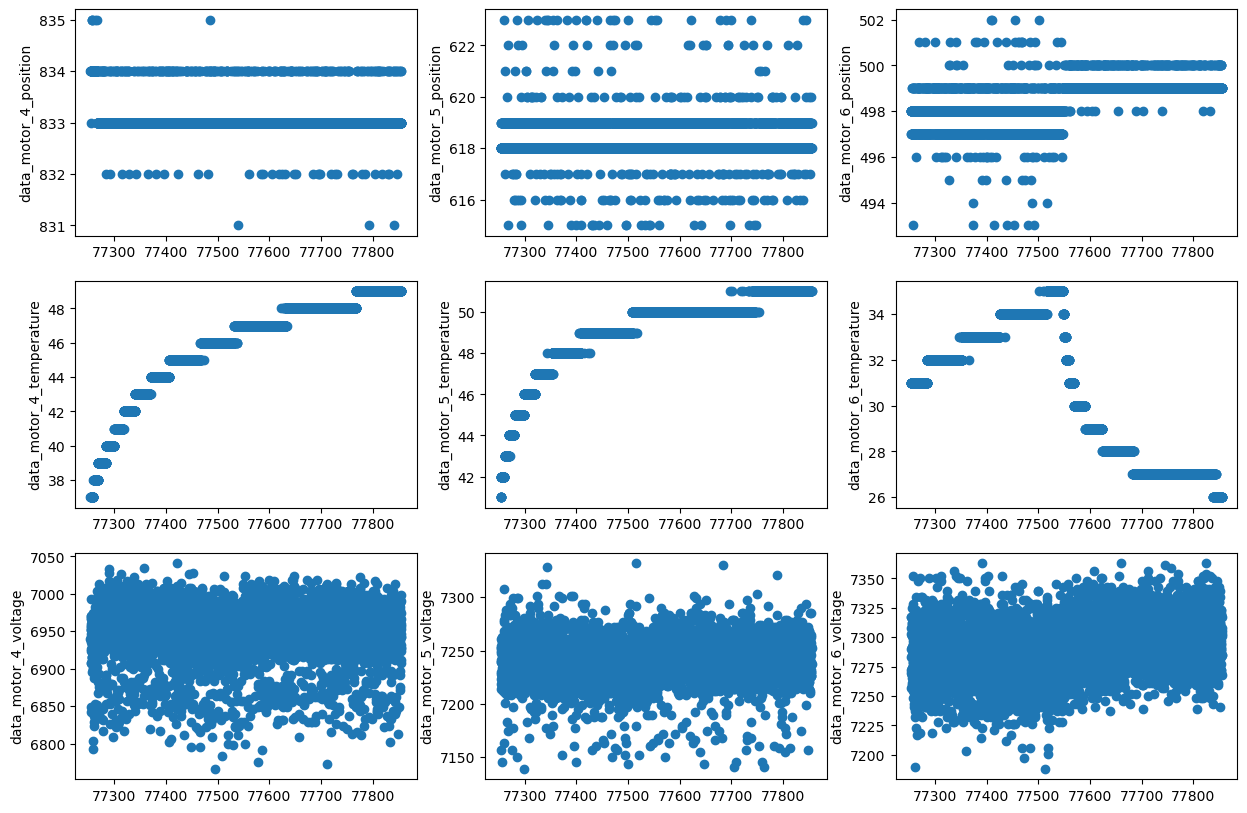

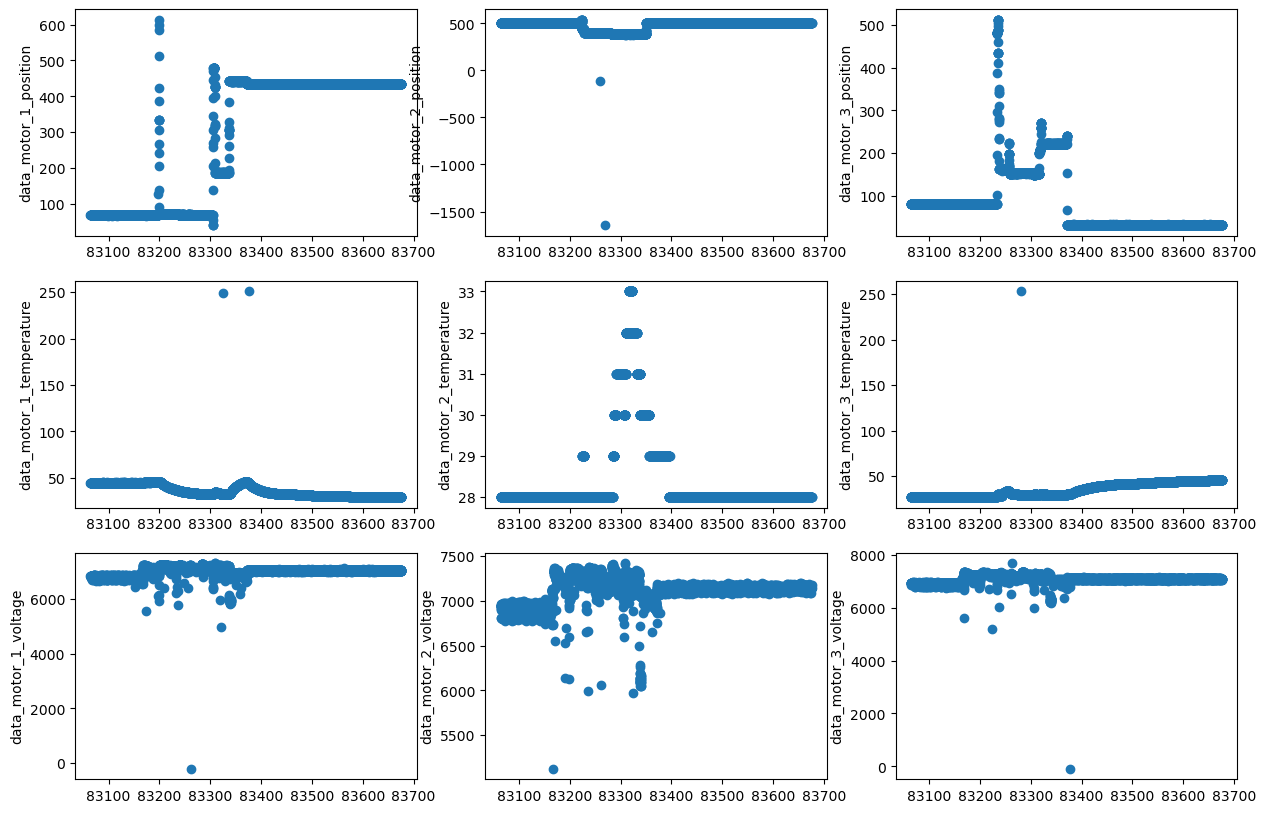

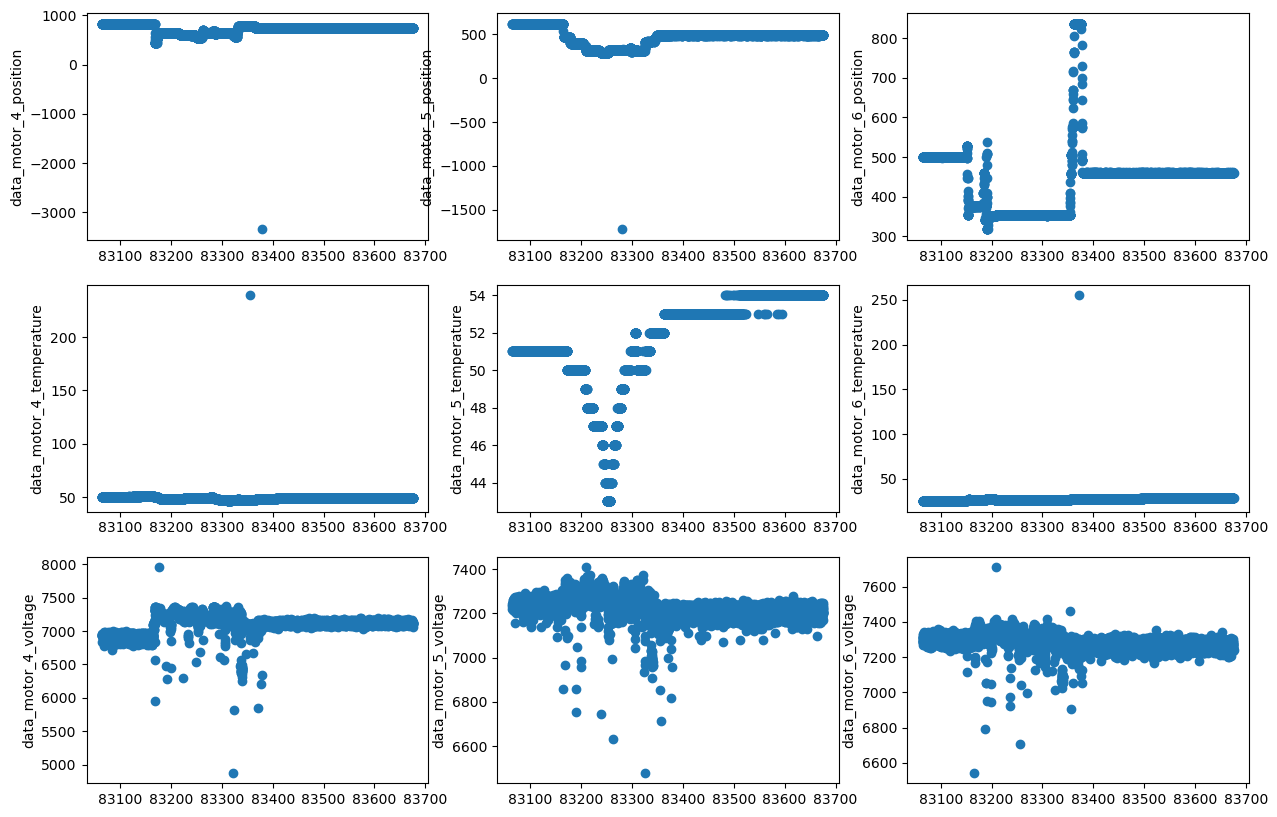

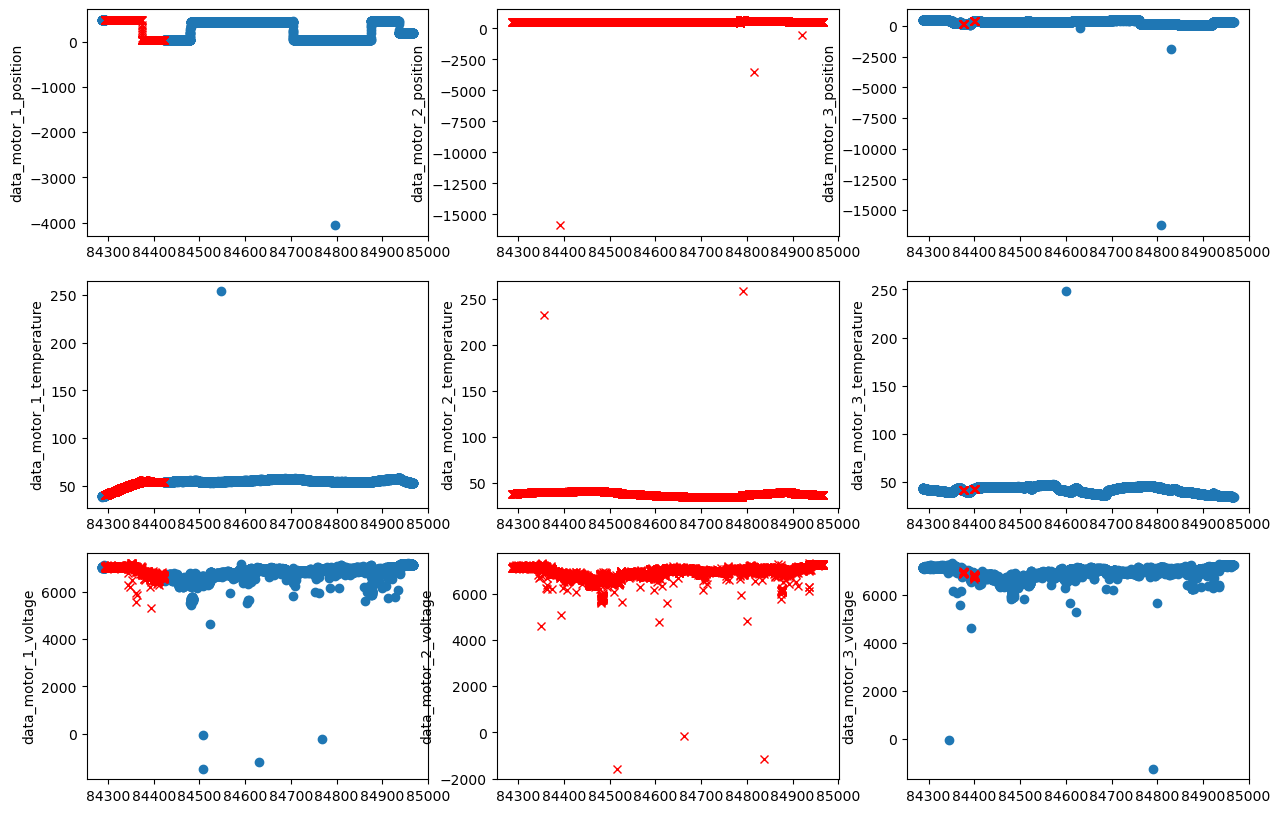

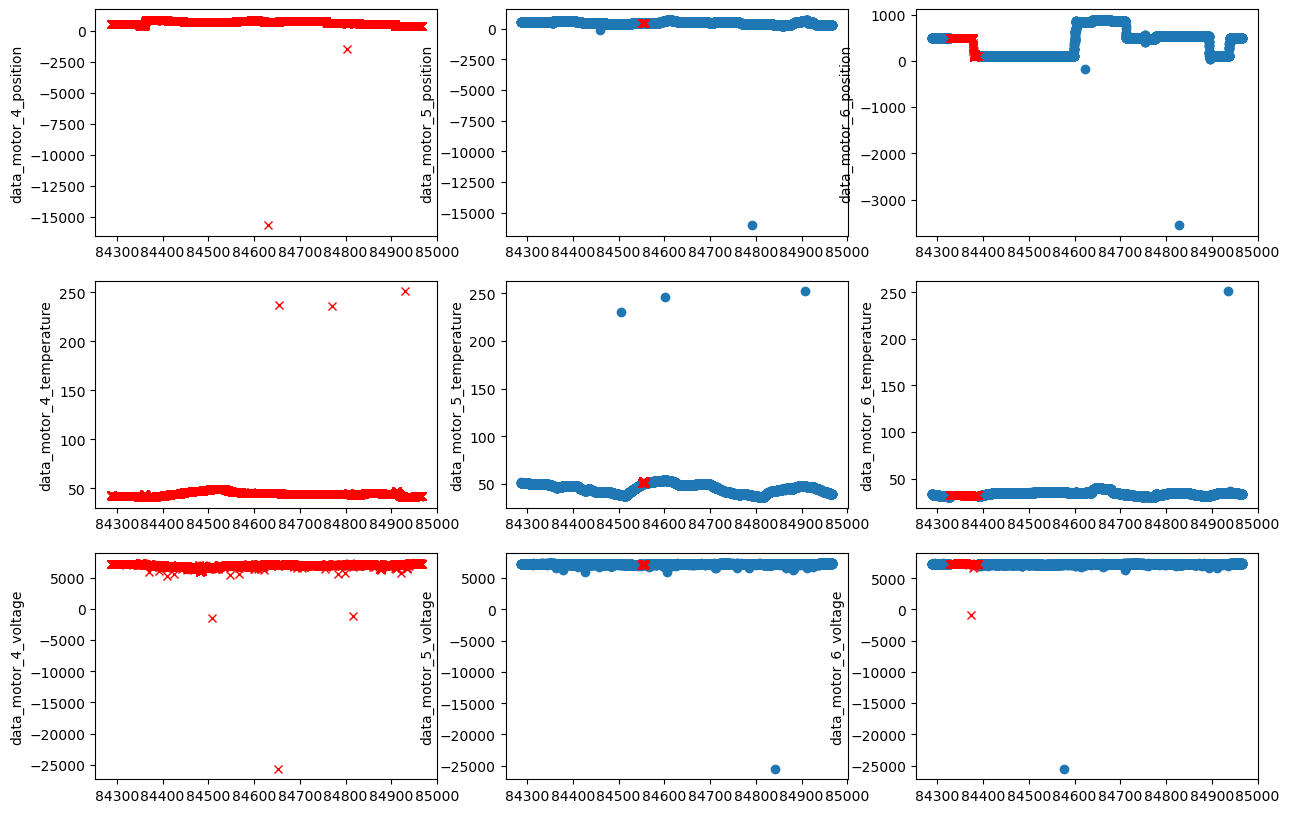

In [2]:
# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'

# Read the data.
df_data = read_all_test_data_from_path(base_dictionary)

Please explain the structure (what does each column represent) of the resulted dataframe here.

The resulted dataframe represent the position, temperature and voltage for each of the 3 motors, as a function of time, and the label represents whether we failures (1 : red ) or normal data ( 0 : blue). Then the columns repeat these 4 pieces of information for each motor and the last column specifies the test condition.

In [3]:
df_data.head()

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                     80  ...                   0                    619   
1                     80  ...                   0                    619   
2                     79  ...                   0                    619   
3                     79  ...                   0                    619   
4                     79  ...                   0                    619   

   data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                        43                  7312                   0   
1                        43                  7332                   0   
2                        43                  7330                   0   
3                        43                  7319                   0   
4                        43                  7348                   0   

   data_motor_6_position  data_motor_6_temperature  data_motor_6_voltage  \
0                    500                        24                  7361   
1                    499                        24                  7372   
2                    499                        24                  7356   
3                    499                        24                  7374   
4                    499                        24                  7365   

   data_motor_6_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- The duplicated horizontal lines in the position graphs represent noise in the dataset. Nonetheless, there is a lot of noise in the voltage dataframes. Maybe we need to smooth the data for the Voltage dataframe.

- Scaling 

- Outliers : Some outliers in the voltage dataframes.

- No missing values

In [4]:
#use PCA to detect outliers

In [5]:
#No missing values:
df_data.isnull().sum().sum()

0

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

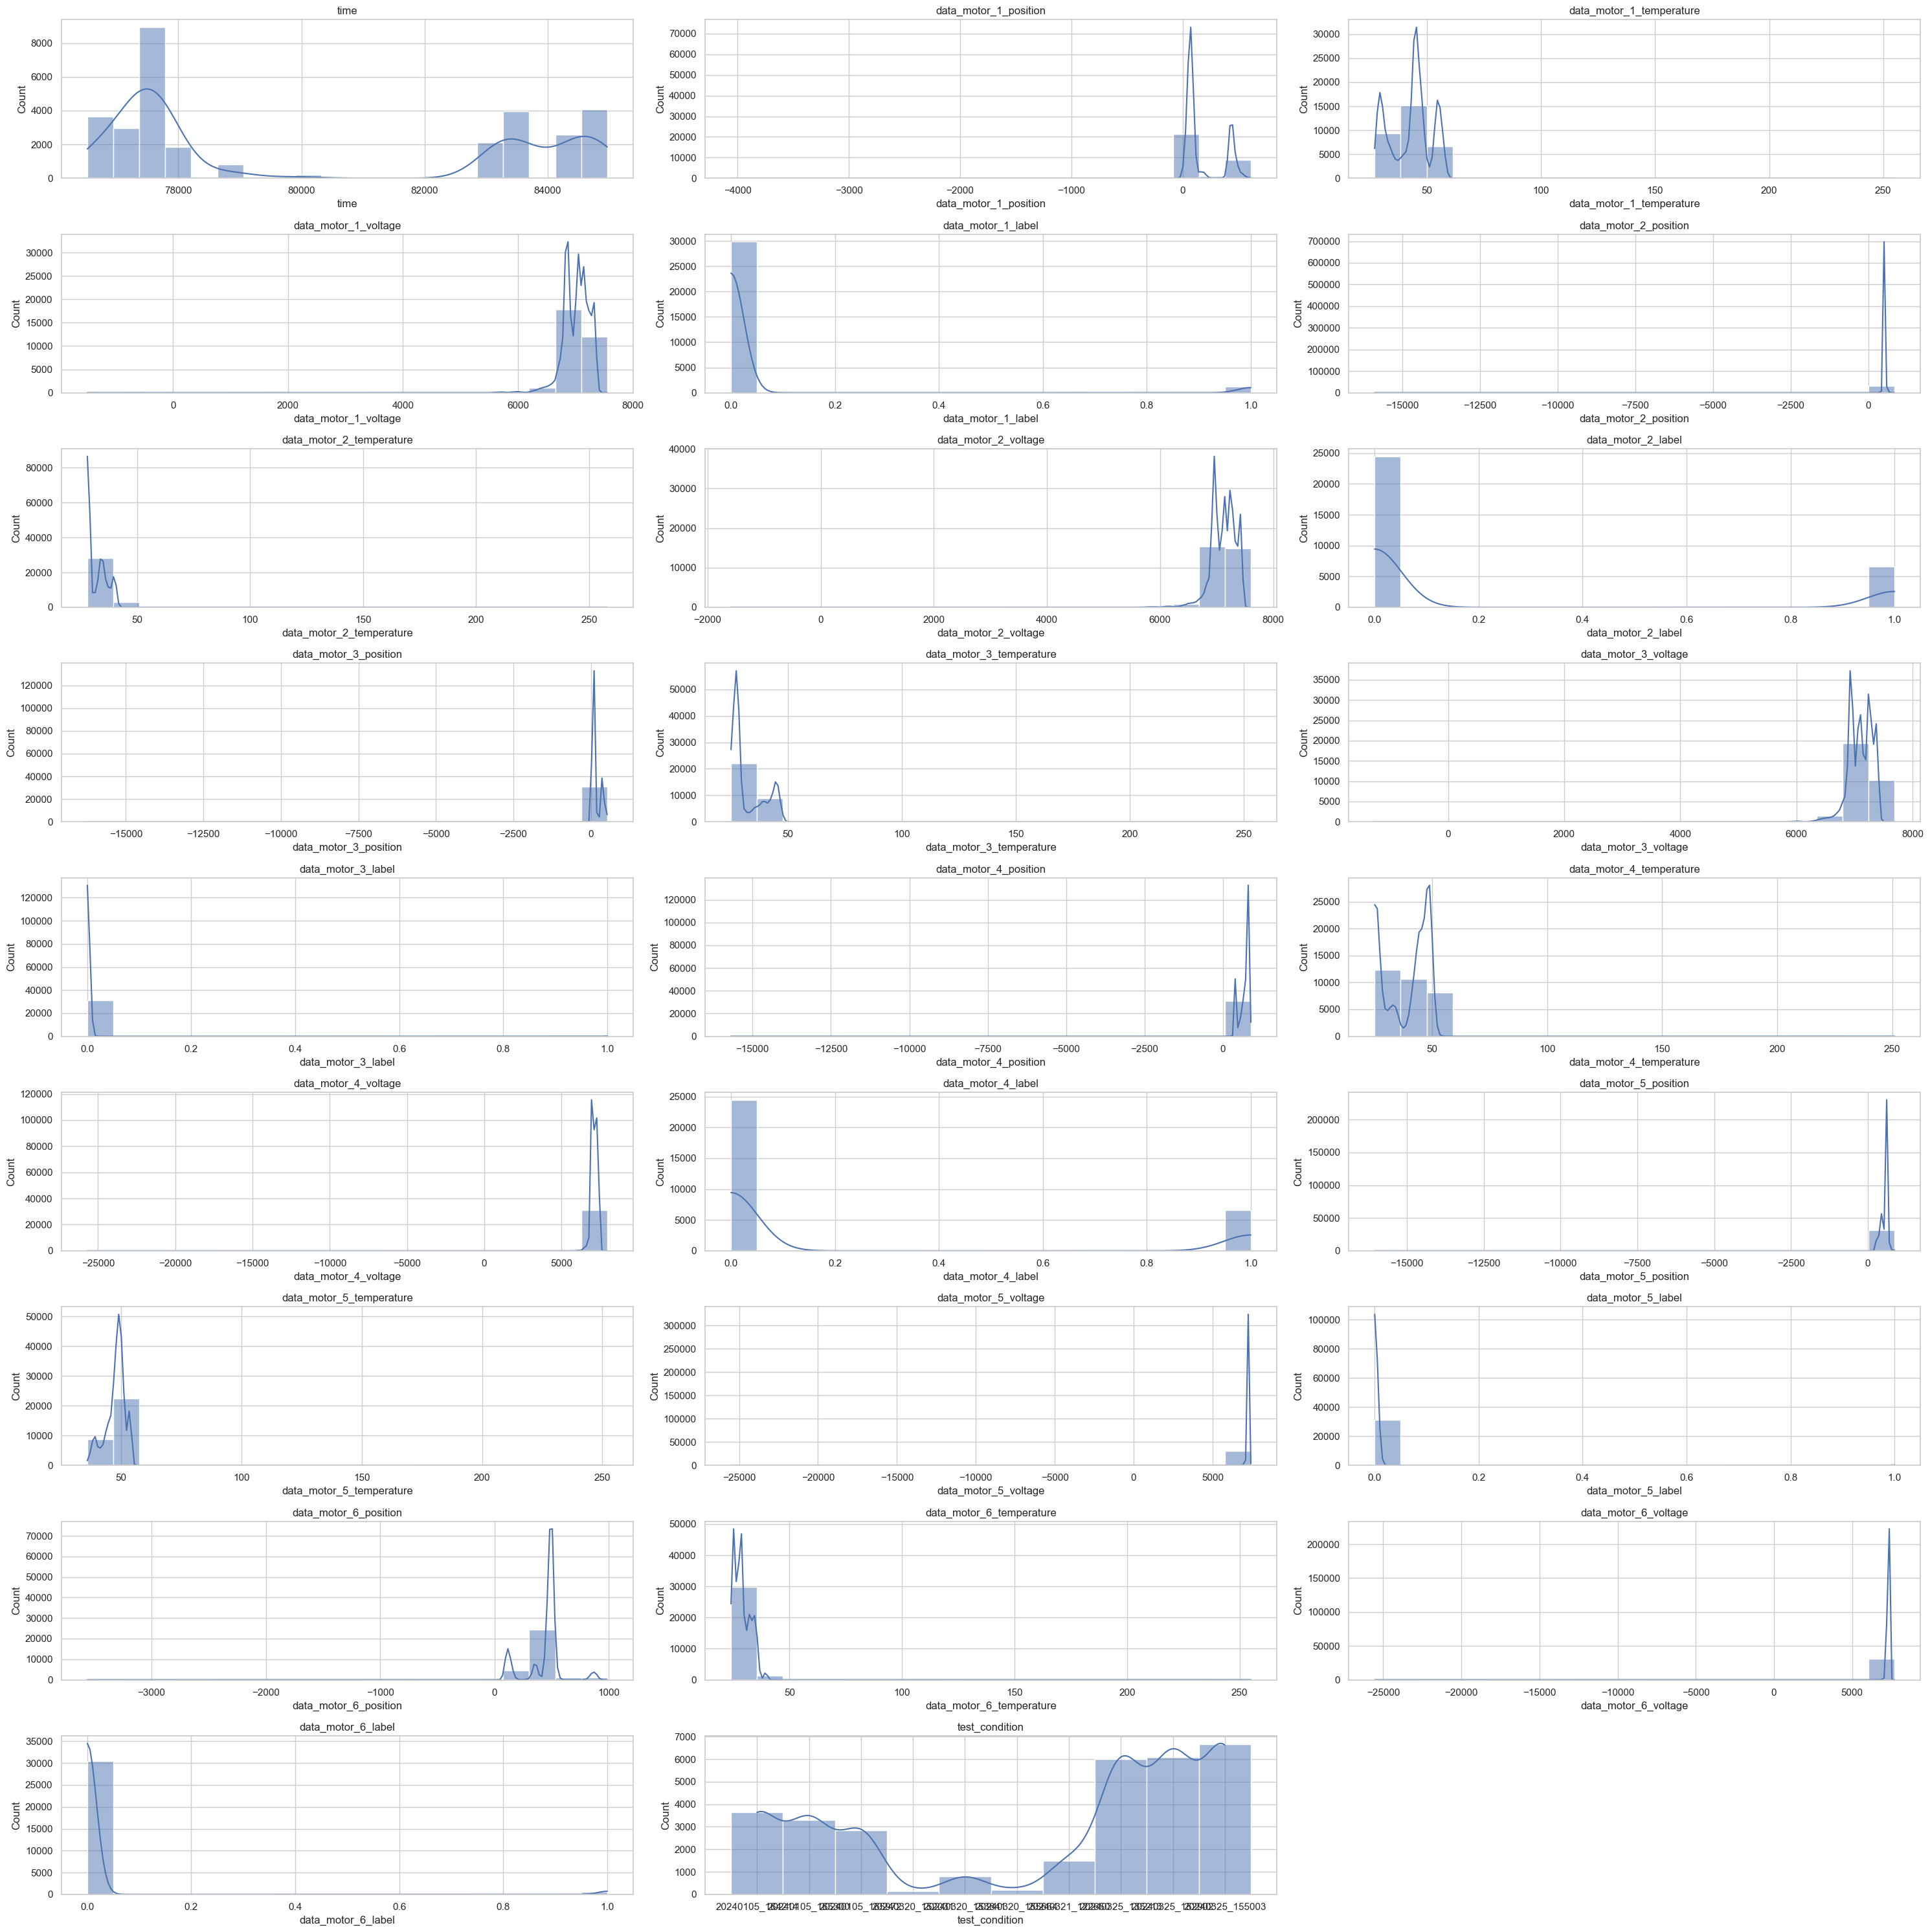

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('mode.use_inf_as_na', True)
sns.set(style="whitegrid")

plt.figure(figsize=(30, 30))
for col in df_data.columns:
    plt.subplot(df_data.shape[1] // 3 + 1, 3, list(df_data.columns).index(col) + 1)
    sns.histplot(df_data[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

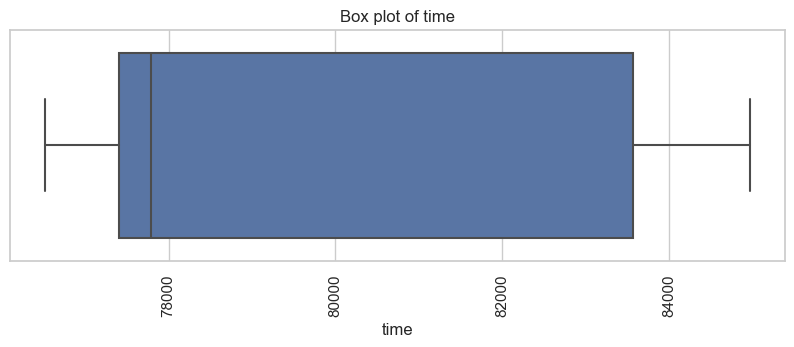

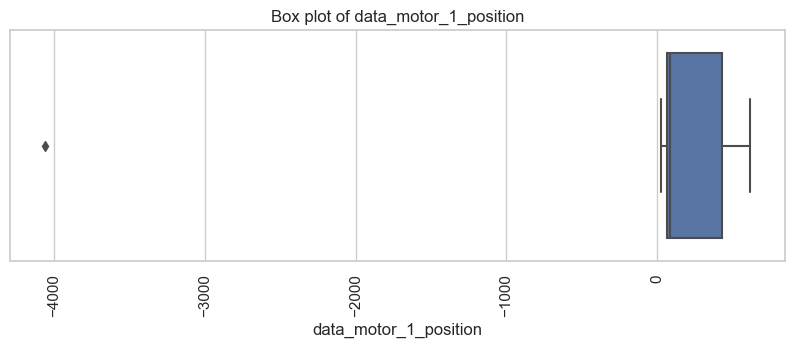

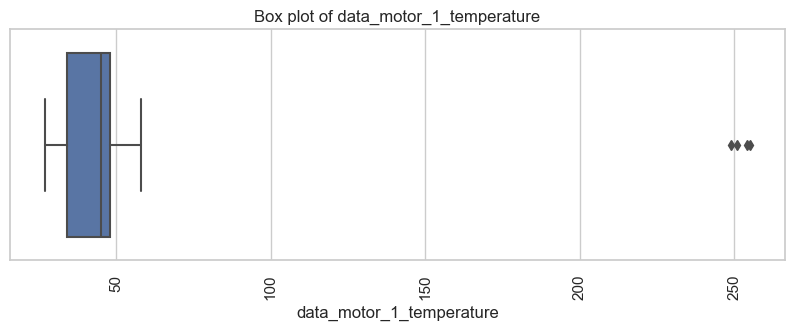

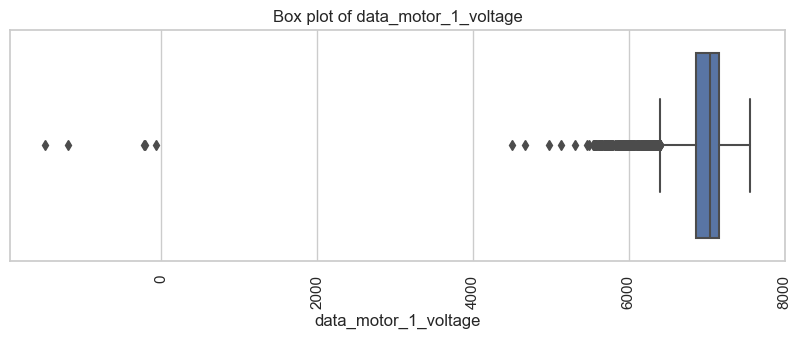

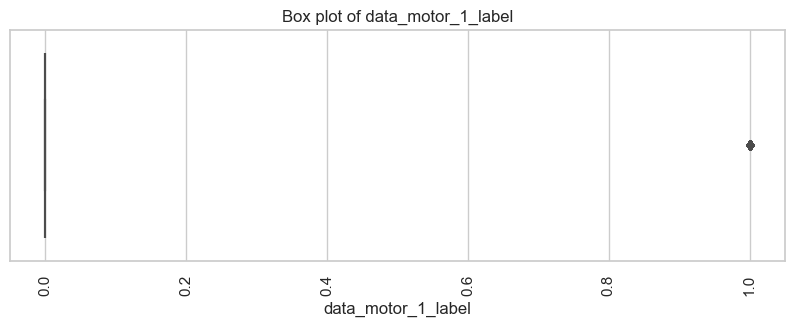

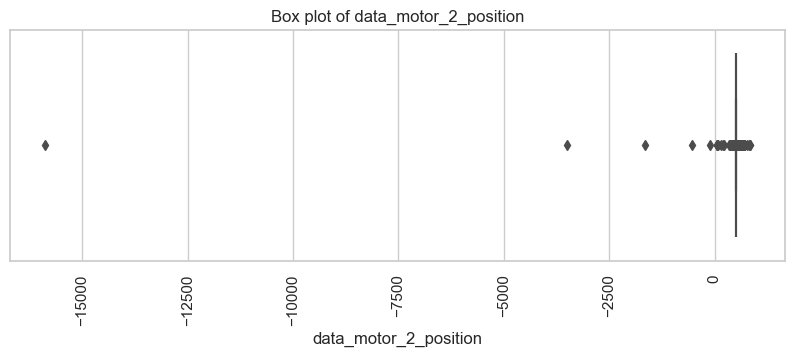

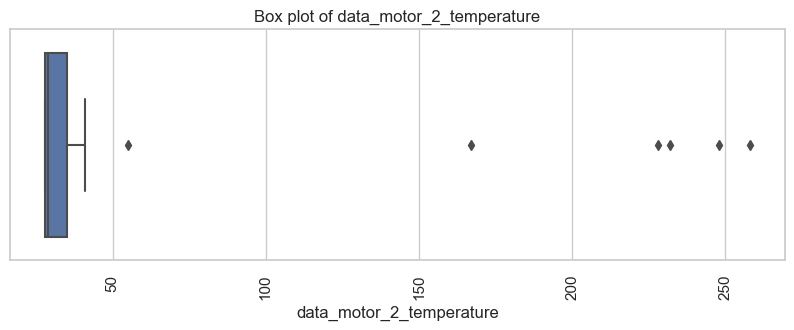

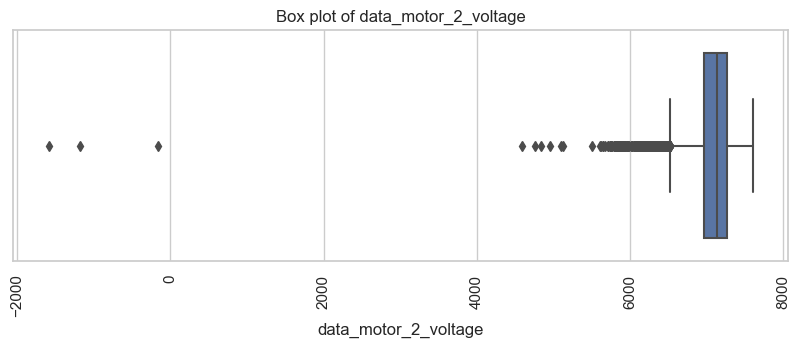

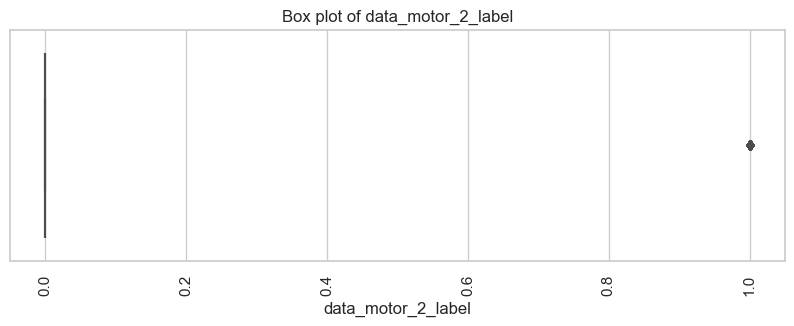

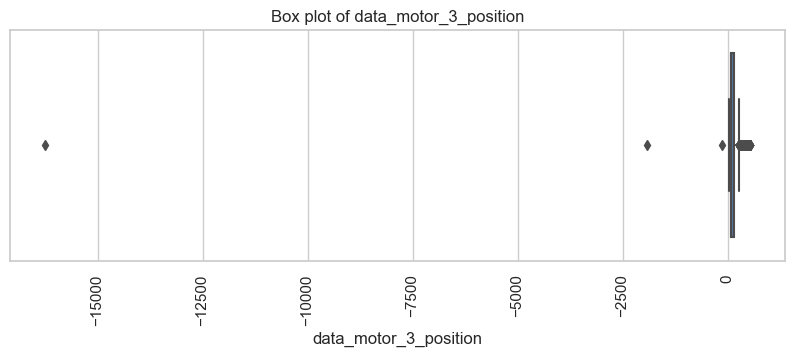

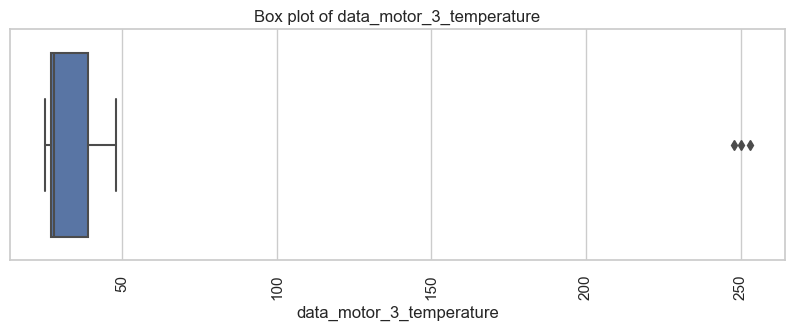

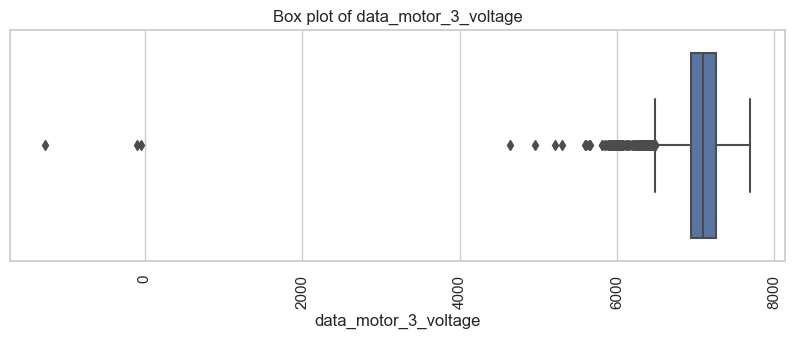

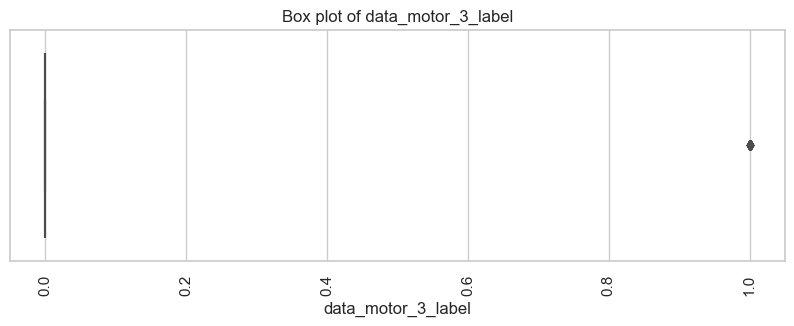

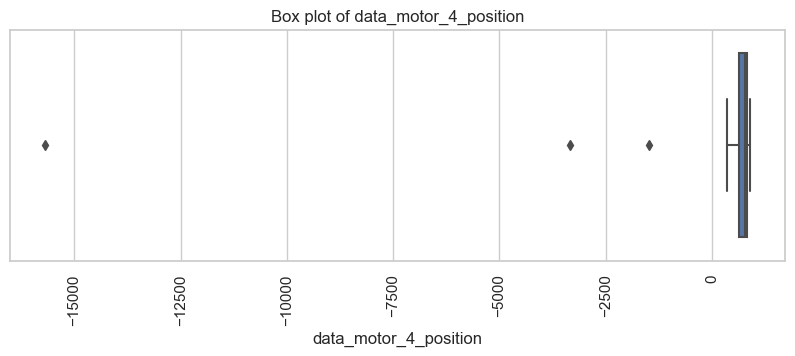

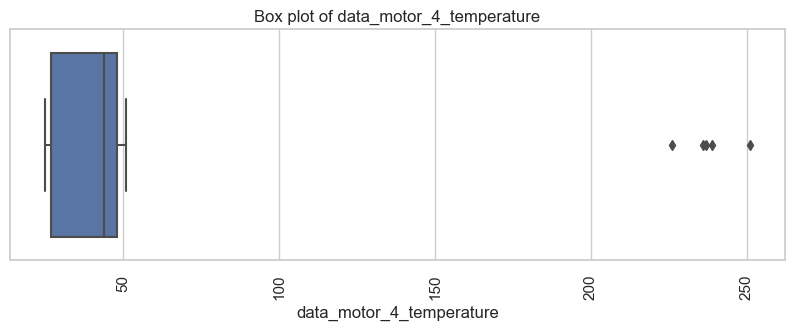

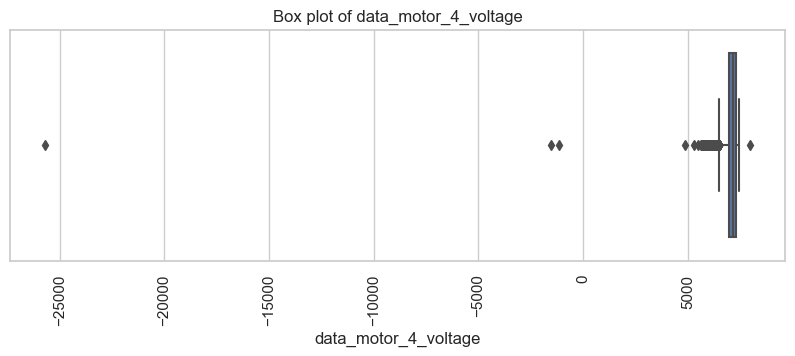

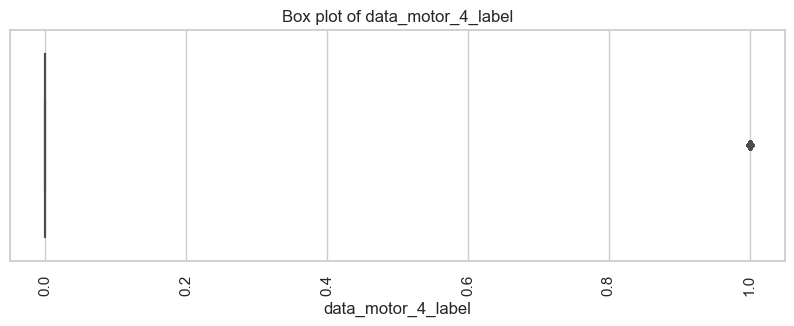

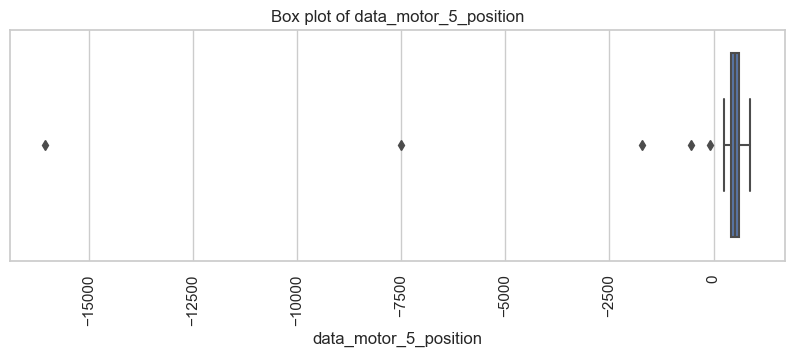

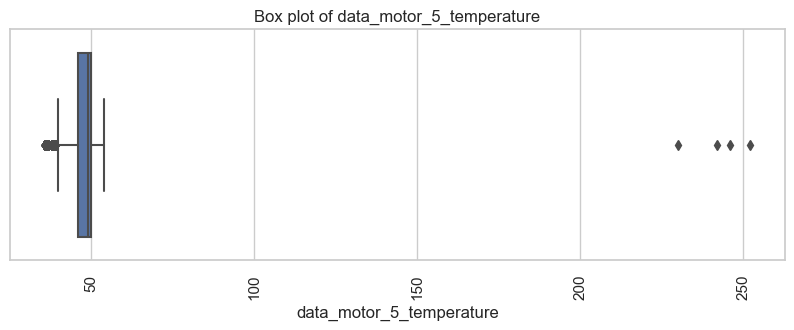

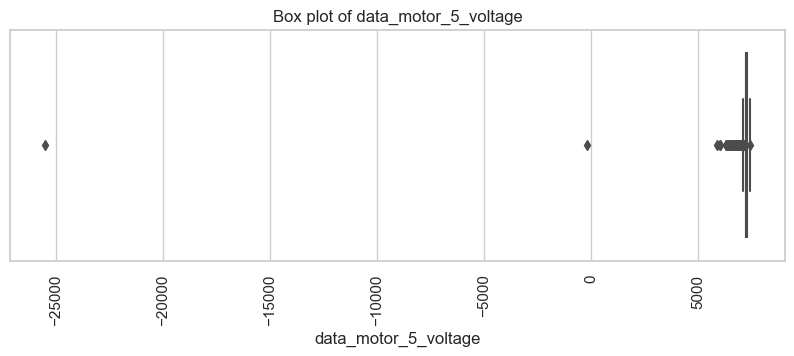

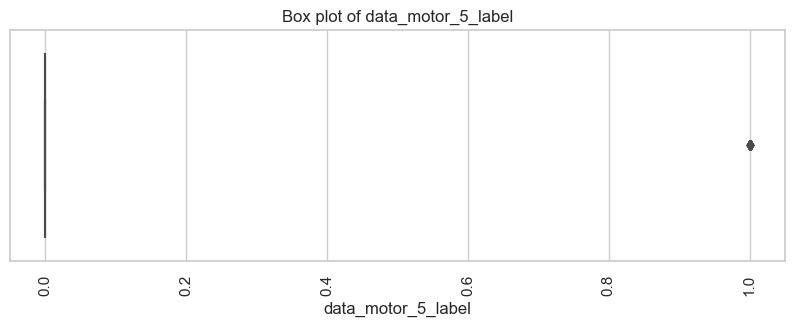

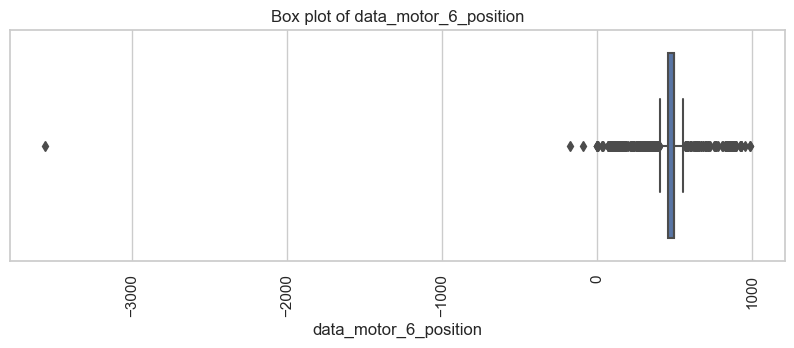

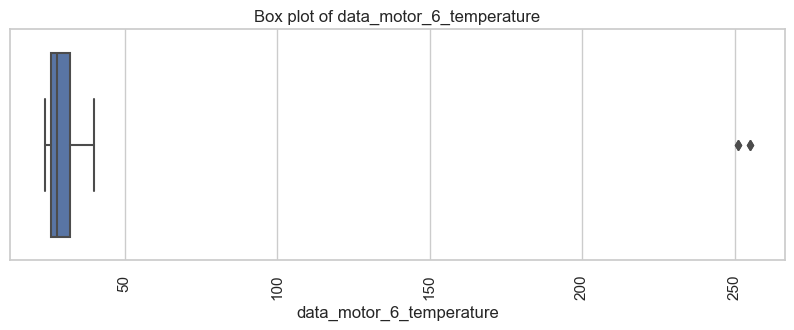

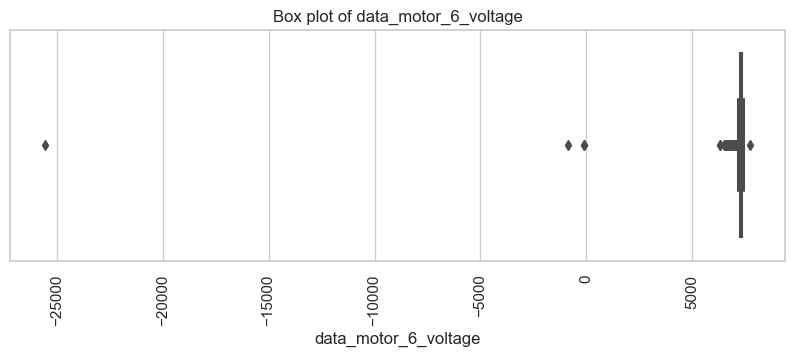

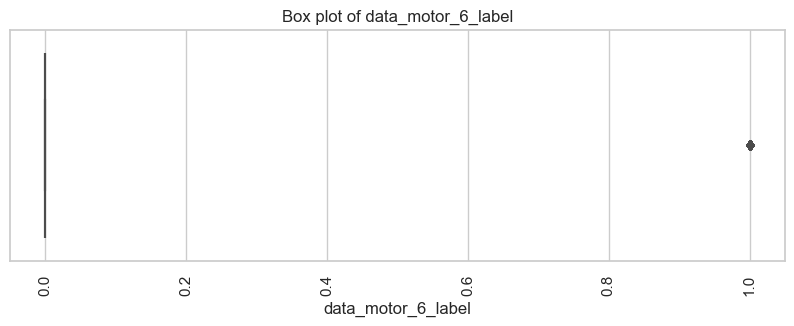

In [8]:
# Box plots
for column in df_data.iloc[:, :-1].columns:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df_data[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


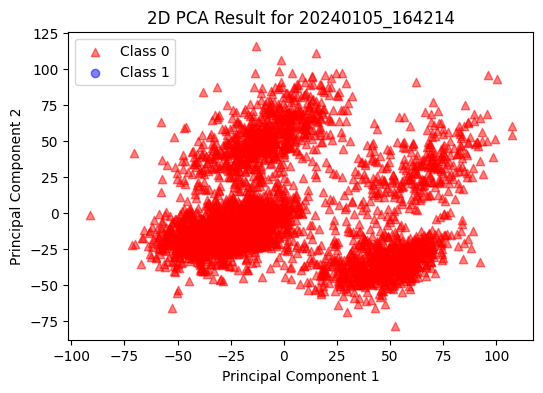

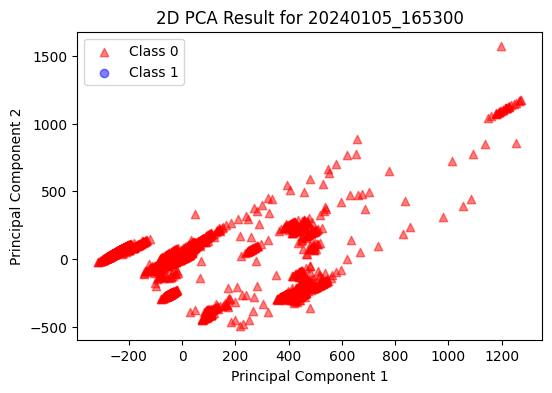

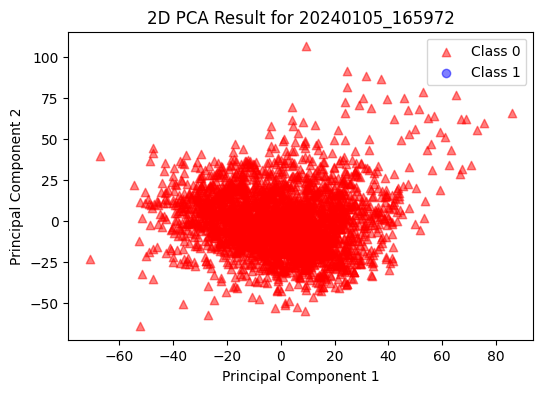

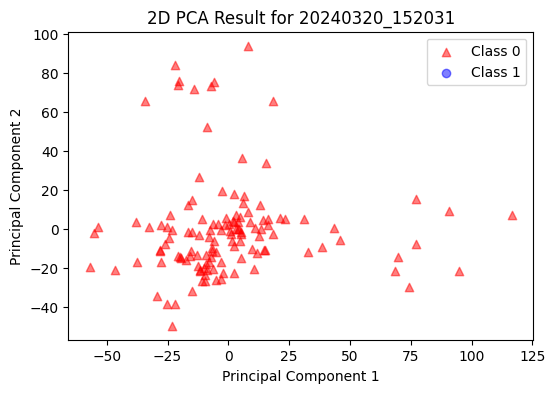

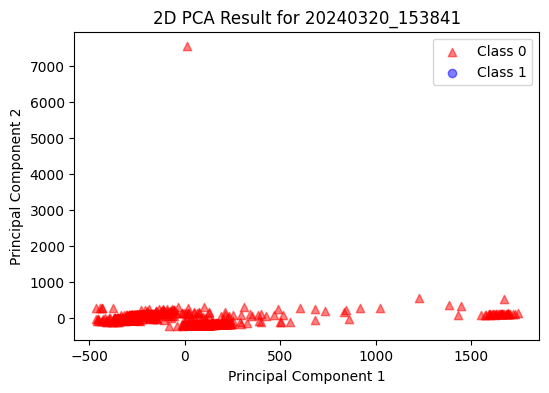

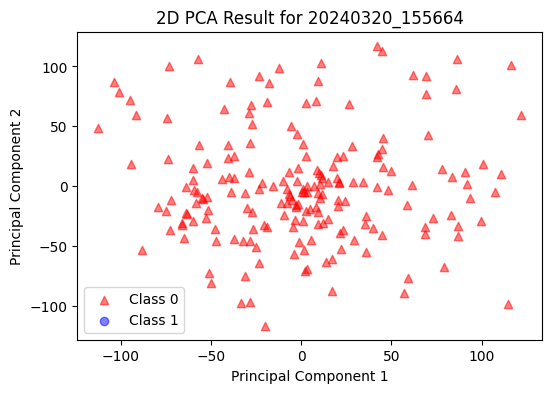

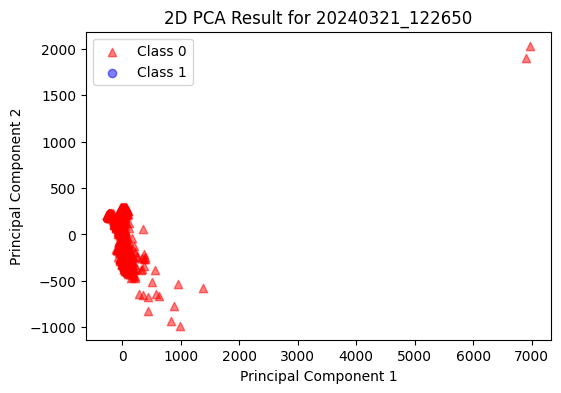

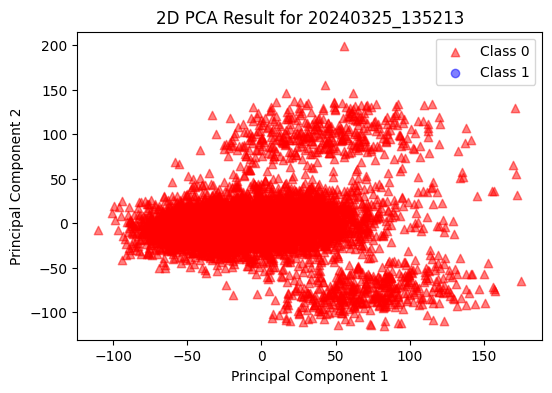

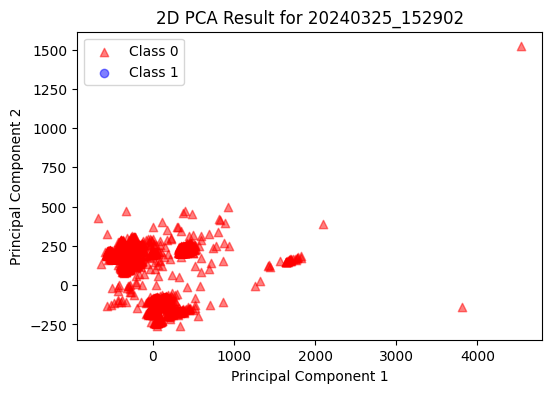

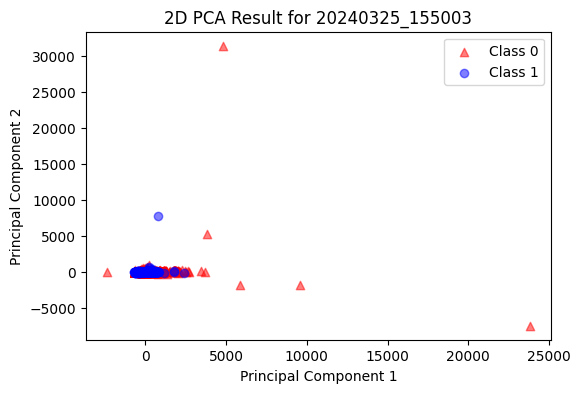

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)

for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # Separate features and target
    X = df.drop(['data_motor_1_label', 'time'], axis=1)
    y = df['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

1) Scale Disparity: There seems to be a significant difference in the scales of the two principal components. The first principal component (the x-axis) ranges from -5000 to 25000, while the second principal component (the y-axis) ranges from -5000 to 30000. This large range suggests that the first principal component captures a wide variety in the data.

2) Class Separation: Points are colored differently to represent two distinct classes in the data. However, there is significant overlap between the two classes, indicating that the data is not clearly linearly separable in the first two principal components.

3) Data Concentration: The majority of data from class 0 and class 1 appear to be concentrated in a relatively small region of the PCA space, with some points from class 0 scattered at higher values on the x-axis.

4) Outlier Values: There are points from class 0 that appear distant from the main concentration of the data, which could indicate the presence of outlier values or atypical behaviors among these observations.

5) Component Analysis: Given the variety and dispersion of points, it's possible that the first principal component represents a feature or set of features very different from those represented by the second principal component.

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize or Standardize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


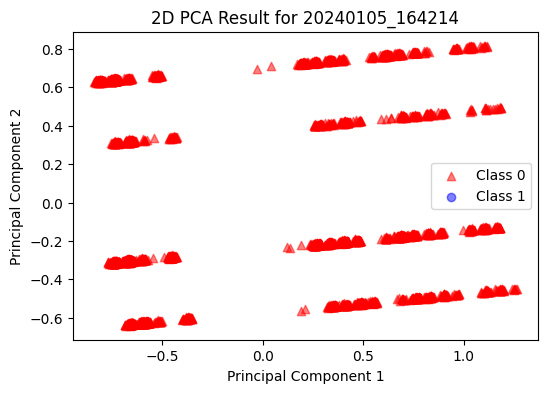

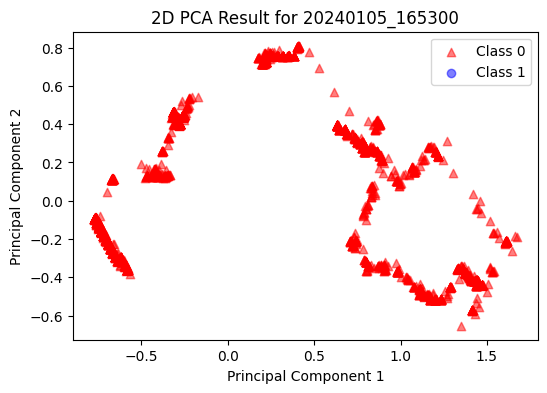

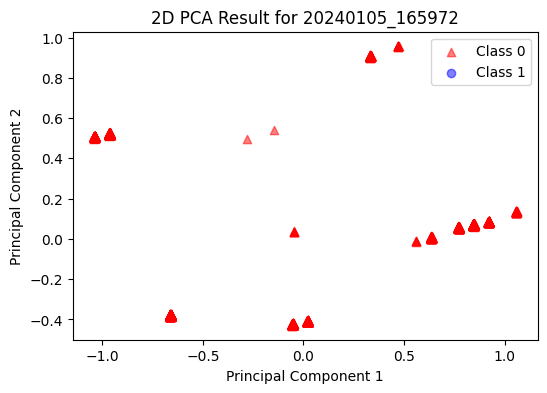

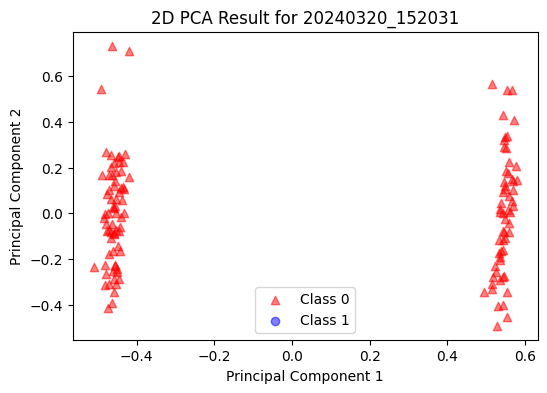

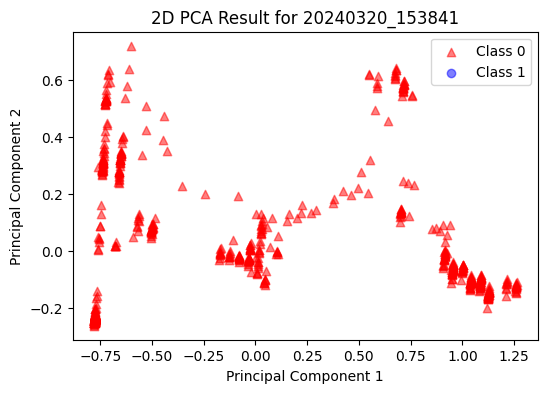

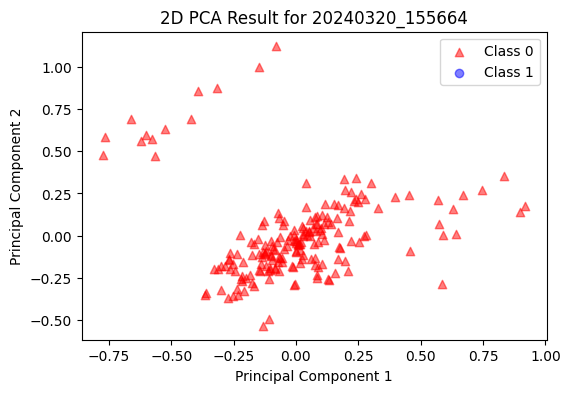

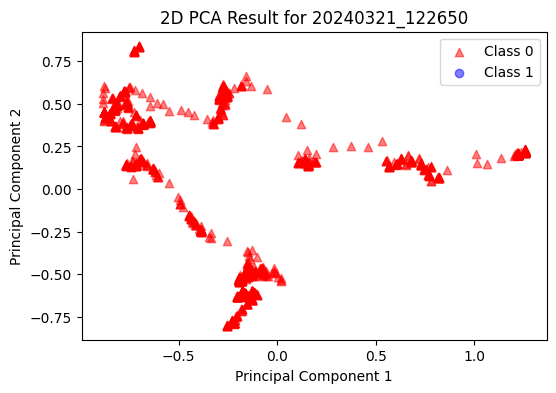

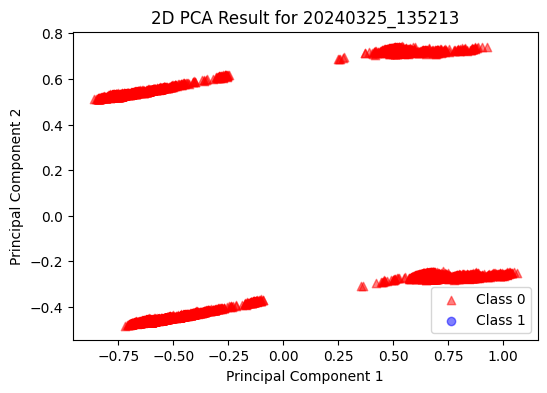

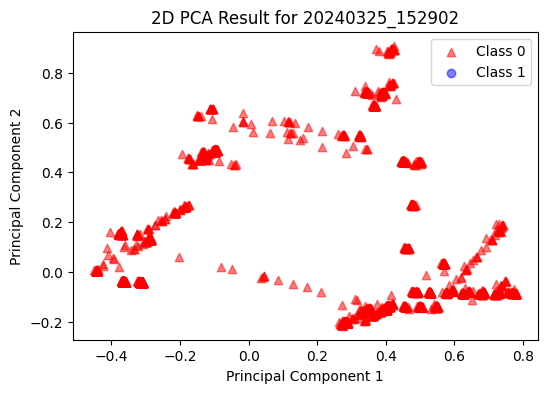

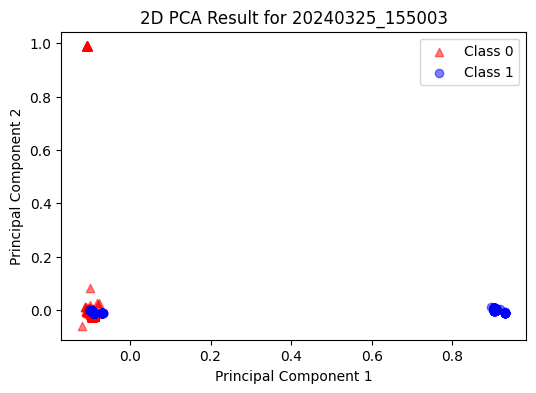

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)

for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # Separate features and target
    X = df.drop(['data_motor_1_label', 'time'], axis=1)
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X)
    y = df['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_norm)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


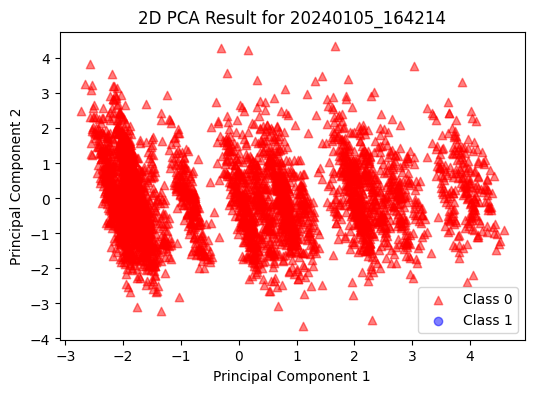

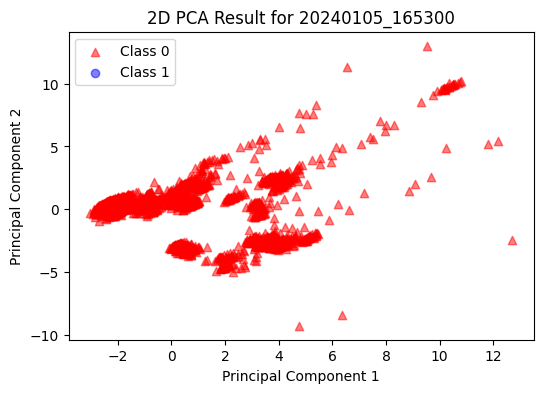

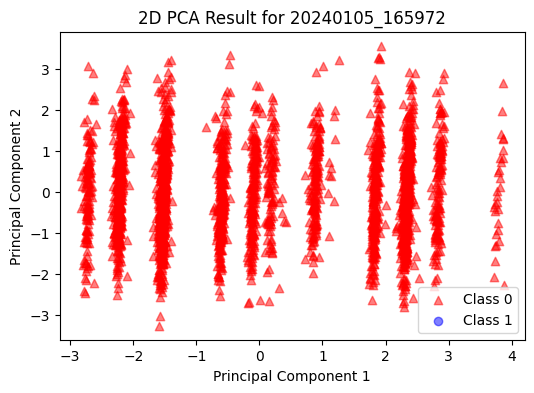

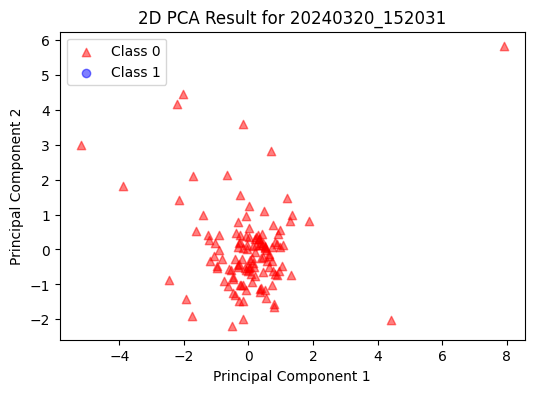

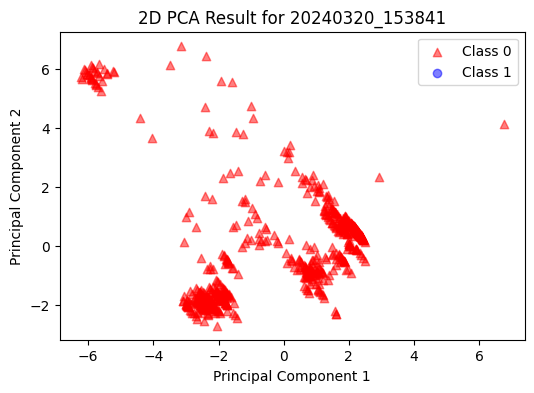

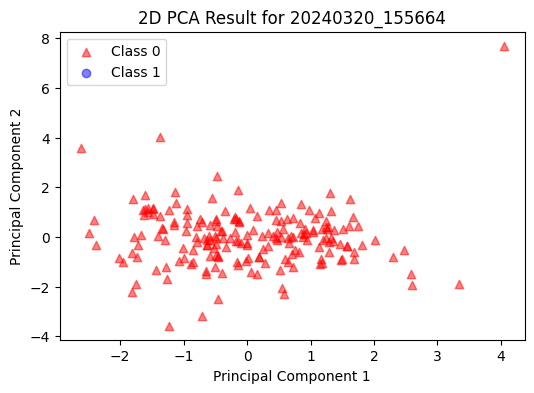

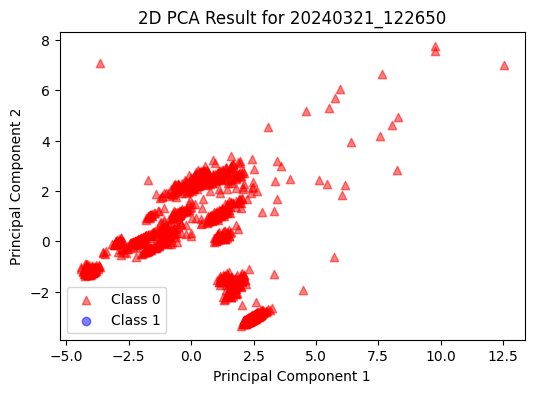

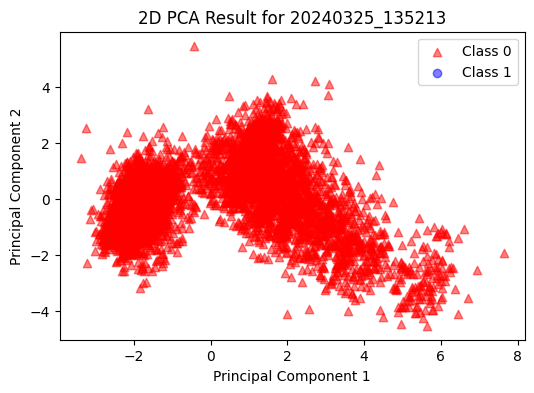

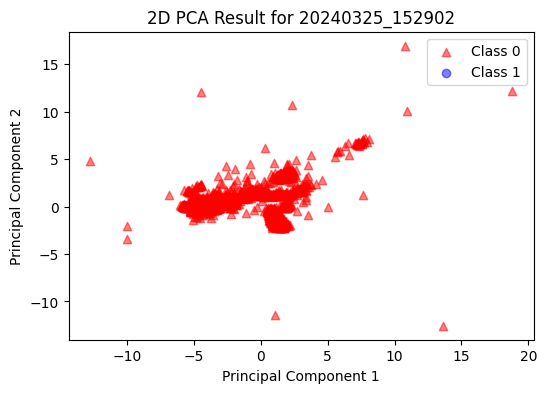

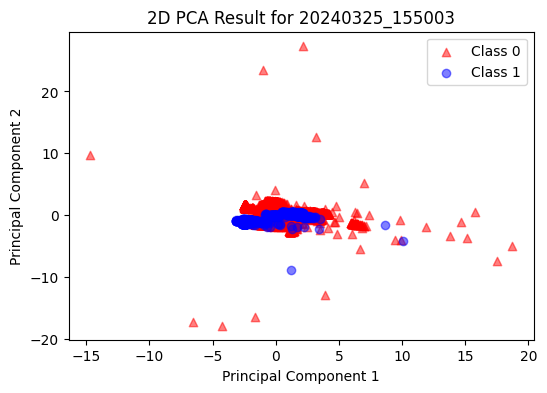

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)

for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # Separate features and target
    X = df.drop(['data_motor_1_label', 'time'], axis=1)
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    y = df['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_standard)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


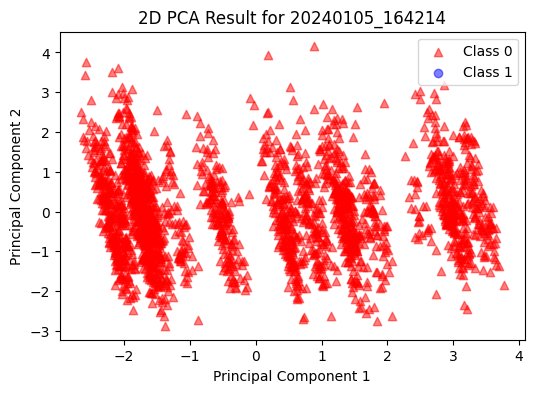

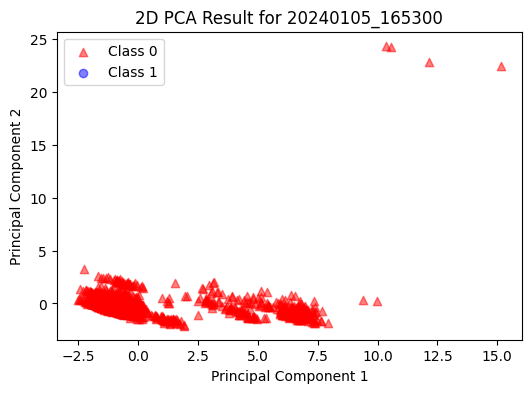

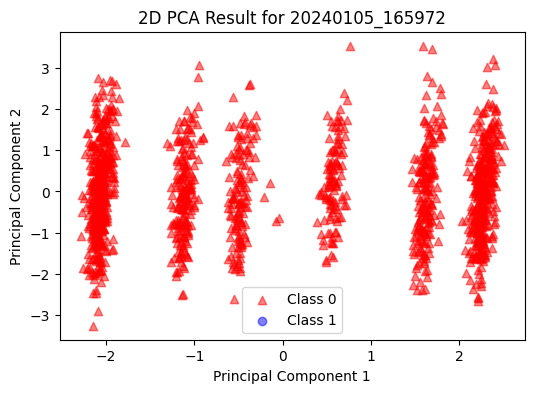

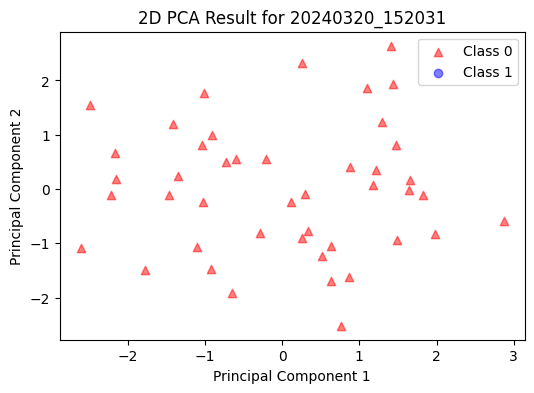

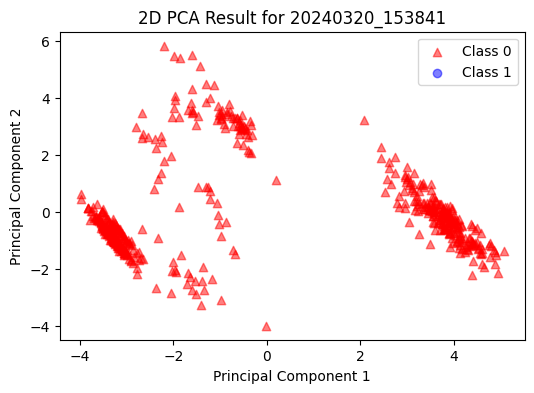

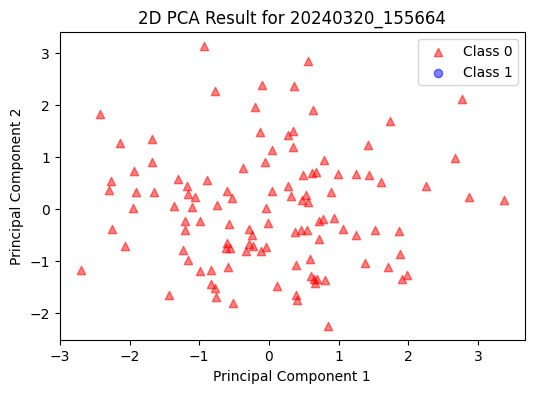

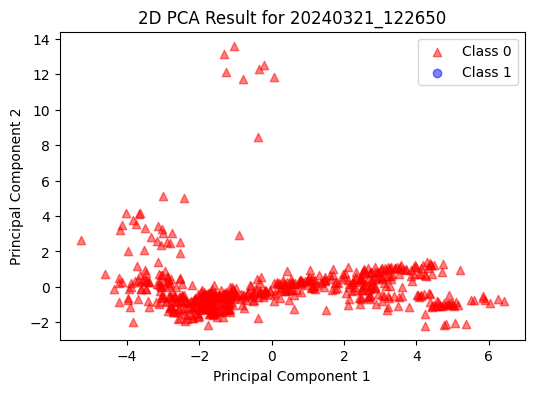

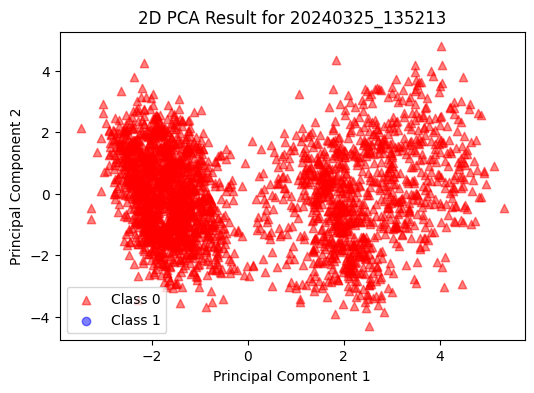

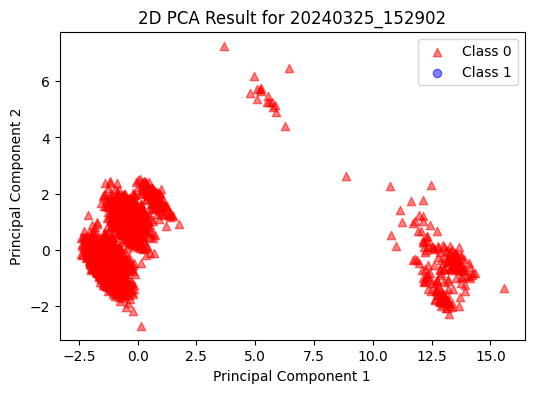

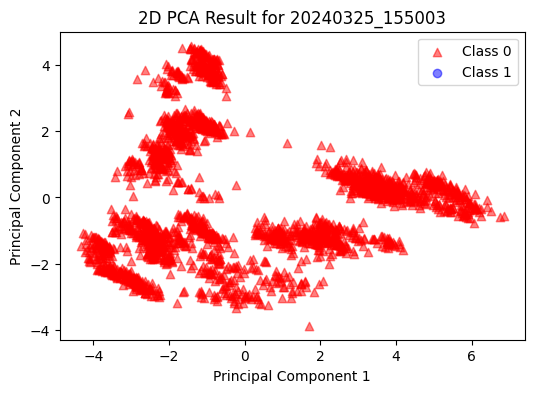

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)

for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # Choose a method to detect outliers, here using the IQR method.
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)
    IQR = Q3 - Q1

    # Define bounds for what is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine a mask for rows without outliers
    mask = ~((df.lt(lower_bound, axis=1)) | (df.gt(upper_bound, axis=1))).any(axis=1)

    # Apply the mask to the DataFrame to filter out the outliers
    df_no_outliers = df[mask]
    # Separate features and target
    X = df_no_outliers.drop(['data_motor_1_label', 'time'], axis=1)
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    y = df_no_outliers['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_standard)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


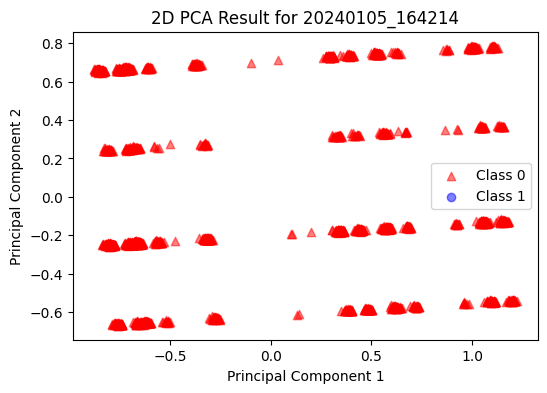

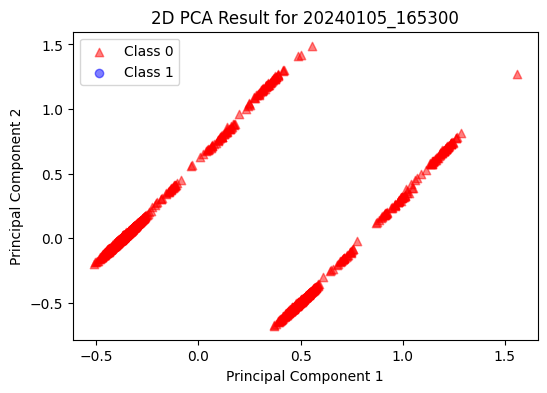

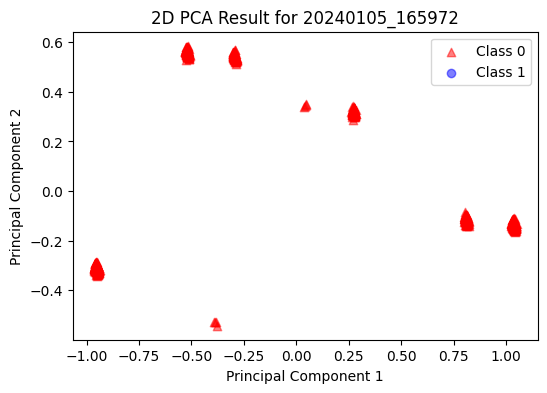

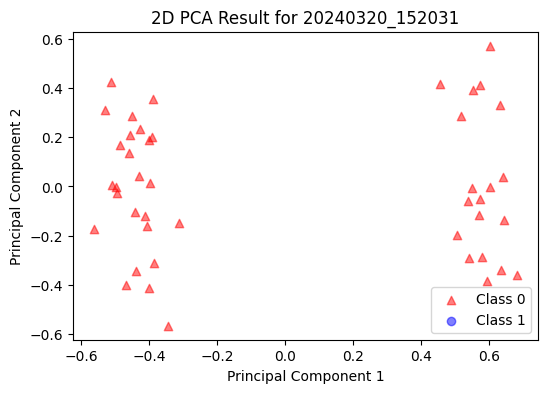

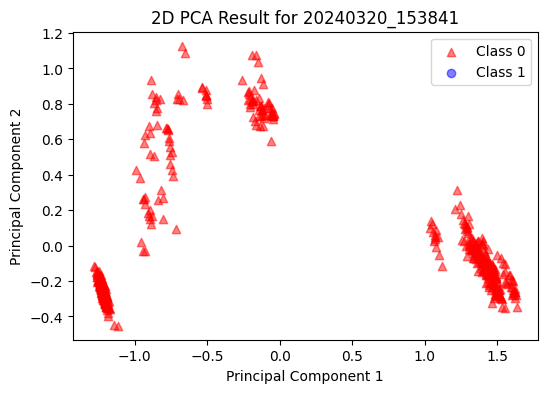

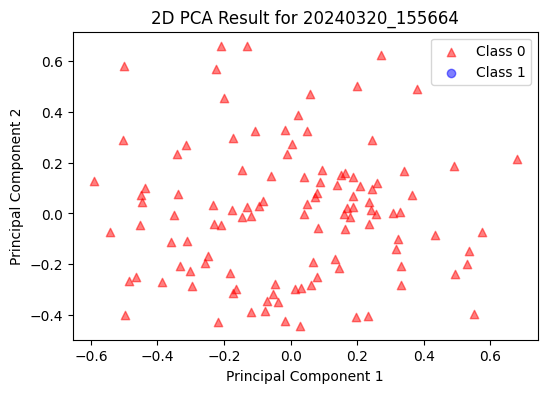

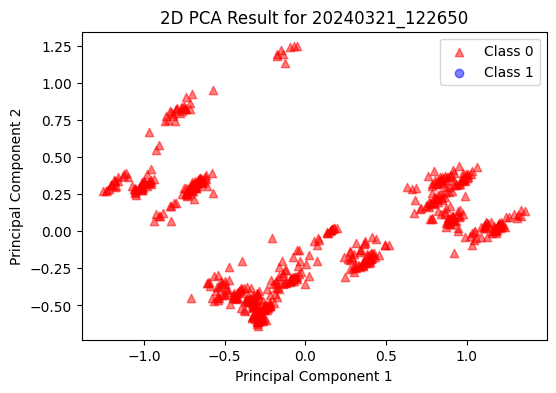

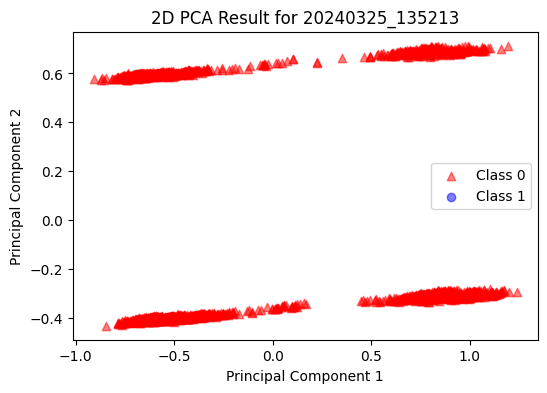

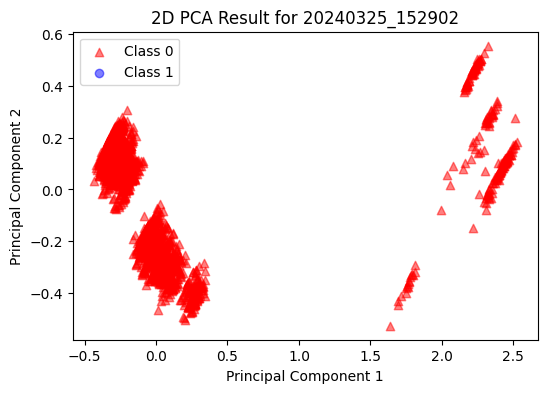

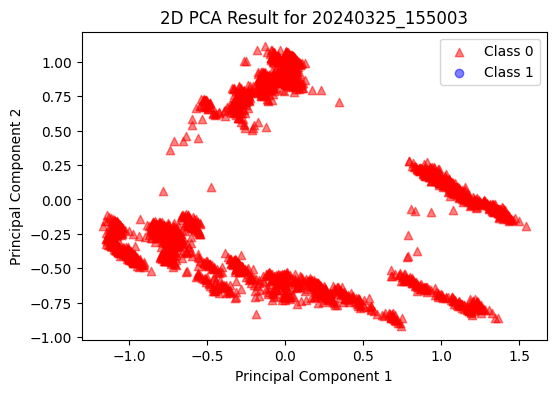

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)

for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # IQR method.
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)
    IQR = Q3 - Q1

    # Define bounds for what is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine a mask for rows without outliers
    mask = ~((df.lt(lower_bound, axis=1)) | (df.gt(upper_bound, axis=1))).any(axis=1)

    # Apply the mask to the DataFrame to filter out the outliers
    df_no_outliers = df[mask]
    # Separate features and target
    X = df_no_outliers.drop(['data_motor_1_label', 'time'], axis=1)
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X)
    y = df_no_outliers['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_norm)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

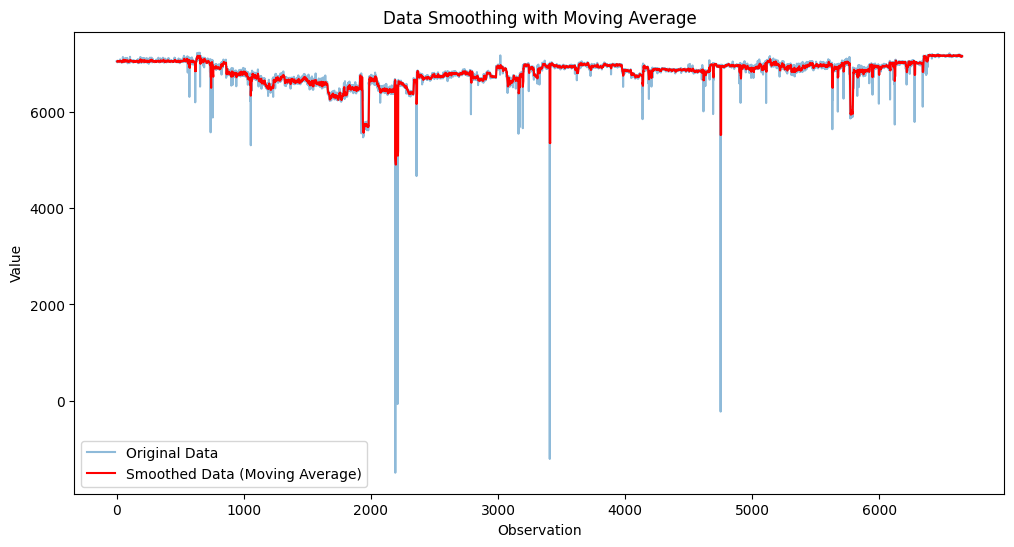

In [ ]:
def smooth_data_moving_average(data, window_size):
    """Smooth data by computing moving average."""
    return data.rolling(window=window_size).mean()

window_size = 5
smoothed_data = smooth_data_moving_average(df['data_motor_1_voltage'], window_size)

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df['data_motor_1_voltage'], label='Original Data', alpha=0.5)
plt.plot(smoothed_data, label='Smoothed Data (Moving Average)', color='red')
plt.title('Data Smoothing with Moving Average')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Path to the directory containing the training data
training_data_path = '../../dataset/training_data/'

# List all files in the directory
all_files = os.listdir(training_data_path)
data_files = [file for file in all_files if file != 'Test conditions.xlsx']
print(data_files)


for dictionary_name in data_files:
    path = os.path.join(training_data_path, dictionary_name)
    df = read_all_csvs_one_test(path, dictionary_name)

    # IQR method.
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)
    IQR = Q3 - Q1

    # Define bounds for what is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine a mask for rows without outliers
    mask = ~((df.lt(lower_bound, axis=1)) | (df.gt(upper_bound, axis=1))).any(axis=1)

    # Apply the mask to the DataFrame to filter out the outliers
    df_no_outliers = df[mask]
    smoothed_data = smooth_data_moving_average(df_no_outliers['data_motor_1_voltage'], window_size)
    # Separate features and target
    X = smoothed_data.drop(['data_motor_1_label', 'time'], axis=1)
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X)
    y = df_no_outliers['data_motor_1_label']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_standard)
    
    # Plot the graph
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title(f'2D PCA Result for {dictionary_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
plt.show()

['20240105_164214', '20240105_165300', '20240105_165972', '20240320_152031', '20240320_153841', '20240320_155664', '20240321_122650', '20240325_135213', '20240325_152902', '20240325_155003']


ValueError: No axis named 1 for object type Series

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


